In [160]:
import numpy as np
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt

In [161]:
pd.set_option('display.max_rows', 111)
pd.set_option('display.max_columns', 111)

In [162]:
data = pd.read_excel('corona.xlsx')
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

#  EXPLORATORY DATA ANALYSIS

# 1. Analyse Basique

### Objectif : 
Comprendre au maximum les données dont on dispose pour definir une strategie de modelisation.

### Check list de base(non-exhaustive):
#### Analyse de la forme:
   - **Variable target** : SARS-Cov-2 exam result
   - **Lignes et colonnes** : 5644, 111
   - **Type de variables** : qualitatives 41, quantitatives 70
   - **Analyse des valeurs manquantes** : 
       - Beaucoup de NaN(moitié des variable contiennent plus de 90% de NaN) 
       - 2 groupe de données 76% --> Test viral, 89% --> Taux sanguins
#### Analyse du fond:
   - **Visualisation de la target** : 
       - 10% de positifs et
       - 90% negatifs
   - **Signification des variables** : 
       - Variables continues standardisées, skewed(asymetriques), test sanguin
       - Age quantile: difficile d'interpreter ce graphique, clairement ces données ont été traitées, on pourrait penser 0-5 mais cela pourrait aussi être une transformation mathématique. On peut pas savoir car la personne qui a mis ce dataset ne le preciser nul part. Mais ça n'est pas très important. 
       - Variables qualitatives : binaire (1, 1), viral, Rhinovirus qui semble très élévée.
   - **Relations Variables/Target** :
       - Target / Blood : les taux de monocytes, platelets, leukocytes semble lié au covid-19 --> hypothese à tester
       - Target / age   : les individus de faible age sont très peu contaminés ? --> attention on ne connais pas l'age, et on ne sait pas de quand date le dataset(s'il s'agit des enfants on sait que les enfants sont touchés autant que les adultes). En revanche cette variable pourra etre intéressante pour la comparer avec les résultats de tests sanguins.
       - Target / viral : les double maladies de virus sont très rares(avoir 'corona' et 'Influenza A' à la fois par exemple). Rhinovirus/Enterovirus positif - covid-19 négatif ? --> hypothese à tester ? mais il est possible que la région ait subie une épidémie de ce virus. De plus on peut très bien avoir 2 virus en même temps. Tout ça n'a aucun lien avec covid-19
   - **Identification des outliers** : 

# 2. Analyse Plus Détaillée

#### Relation Variables  / Variables
   - blood_data / blood_data: certaines variables sont très corrélées : + 0.9 ( à surveiller plus tard)
   - blood_data / age: très faible relation entre age et taux sanguins
   - viral / viral : Influenza rapide test donne de mauvais resultats(d'après les recherche sur internet), il faudra peut etre la laisser tomber
   - relation maladie / bood_data: Les taux saguin entre malades et covid-19 sont differents.
   - relation hospitalisation / est malade : 
   - relation hospitalisation / est malade : Intéressant dans le cas où on voudrait predire dans quel service un patient devrait aller
   - **NaN analyse** : viral 1350(92 negatifs / 8 positifs), blood : 600(86 negatifs/13 positifs), both: 90

## Hypotheses nulle(H0):
   - Les individus atteints du covid-19 ont des taux de Leukocytes, Monocytes, Platelets significativement differents
       - H0 = Les taux moyens sont EGAUX chez les individus positifs et negatifs (après l'analyse on rejette cette hypothese)
   - Les individus atteints d'une quelconque maladie ont des taux significativement différents

## 1. ANLYSE BASIQUE

## Analyse de la forme des données

In [300]:
df = data.copy()

In [301]:
df.shape

(5644, 111)

object     20
float64    14
int64       4
Name: count, dtype: int64


<Axes: ylabel='count'>

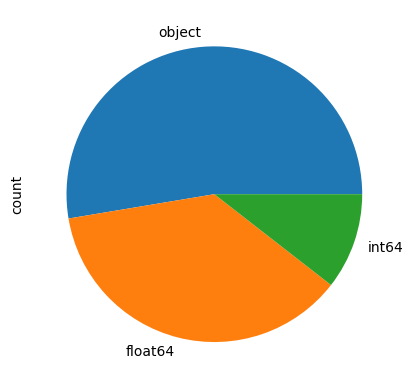

In [344]:
#Type de variables
print(df.dtypes.value_counts())
df.dtypes.value_counts().plot.pie()

<Axes: >

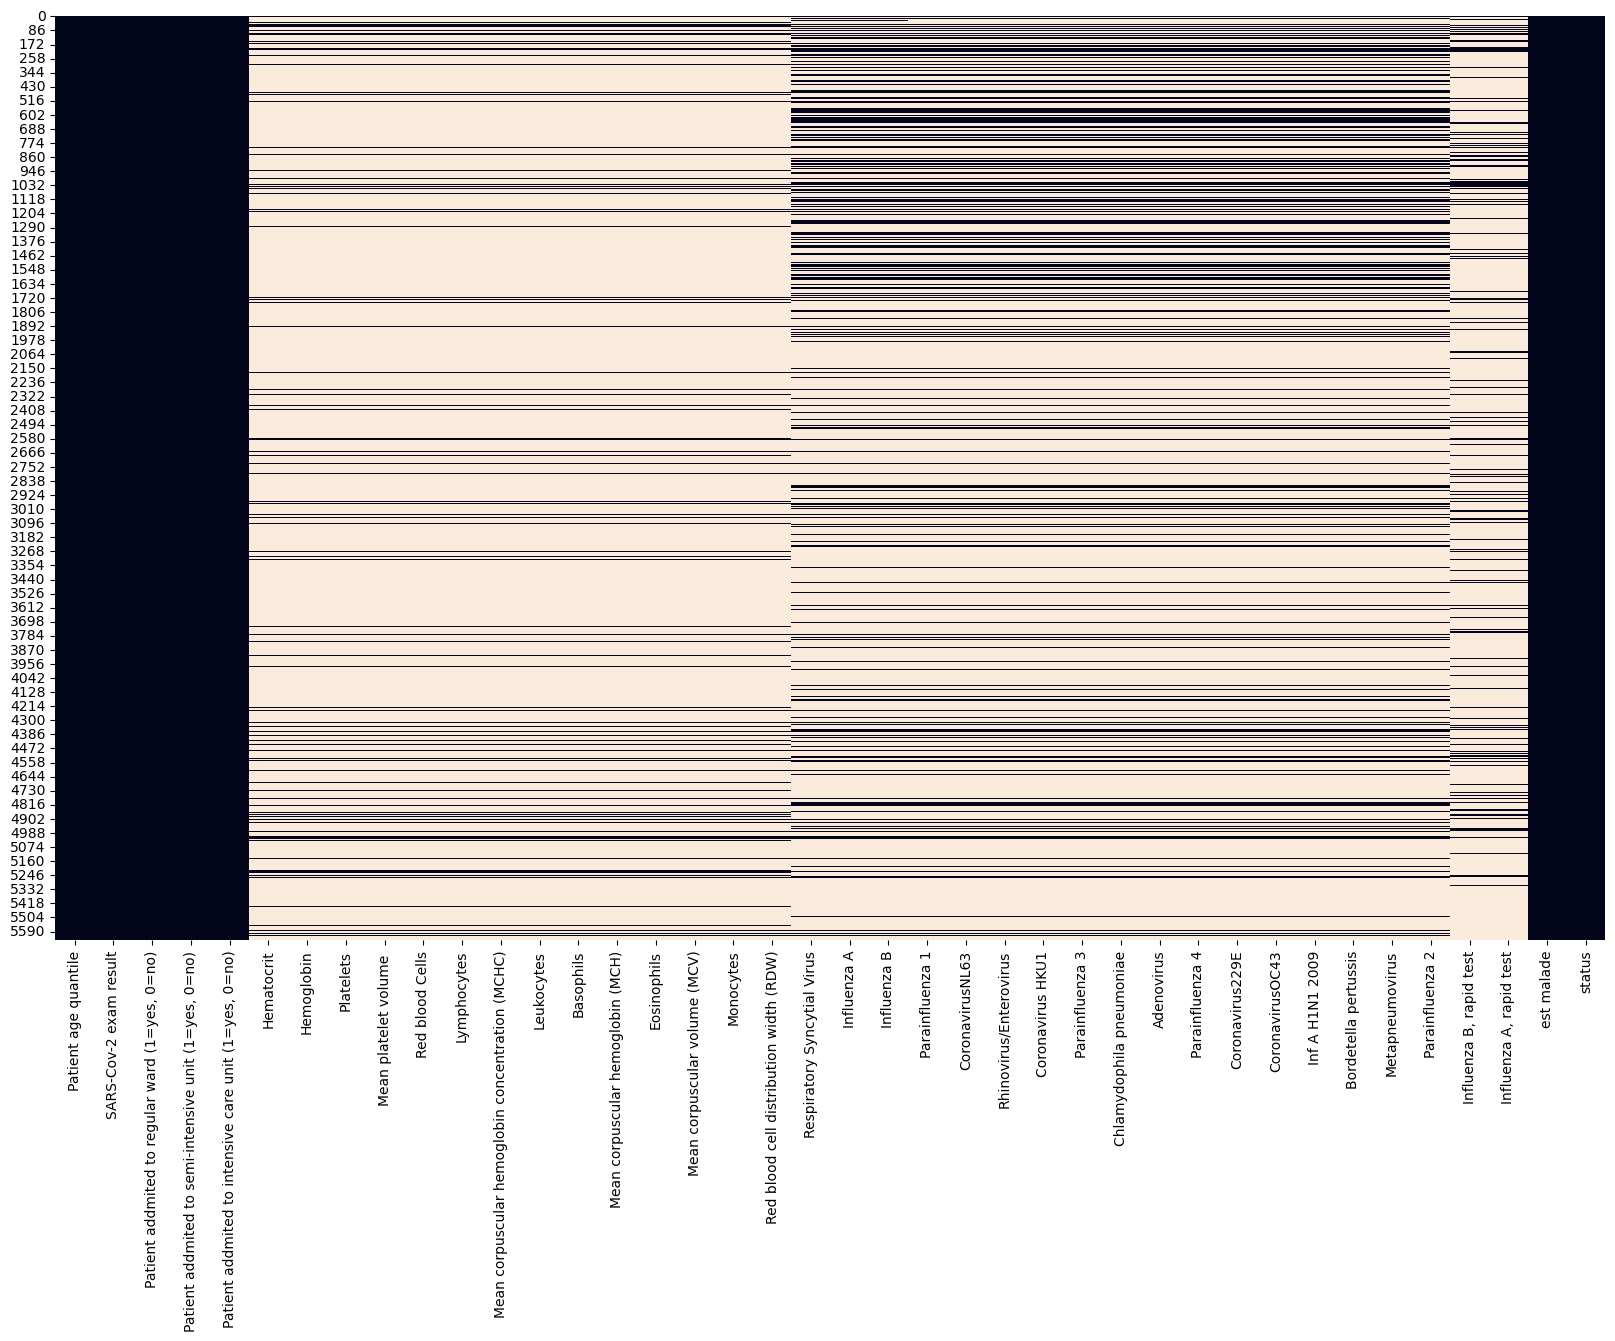

In [479]:
plt.figure(figsize=(20,12))
sns.heatmap(df.isna(), cbar=False)

In [304]:
#Analyse des valeur manquantes, le pourcentage des valeurs manquantes pour chaque colonne
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

## Analyse du Fond

### 1. Visualisation initiale - Elimination des colones inutiles

In [305]:
#Toutes les colonnes dont le pourcentage de NaN est inferieur à 90%
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]

In [306]:
df

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903        

<Axes: >

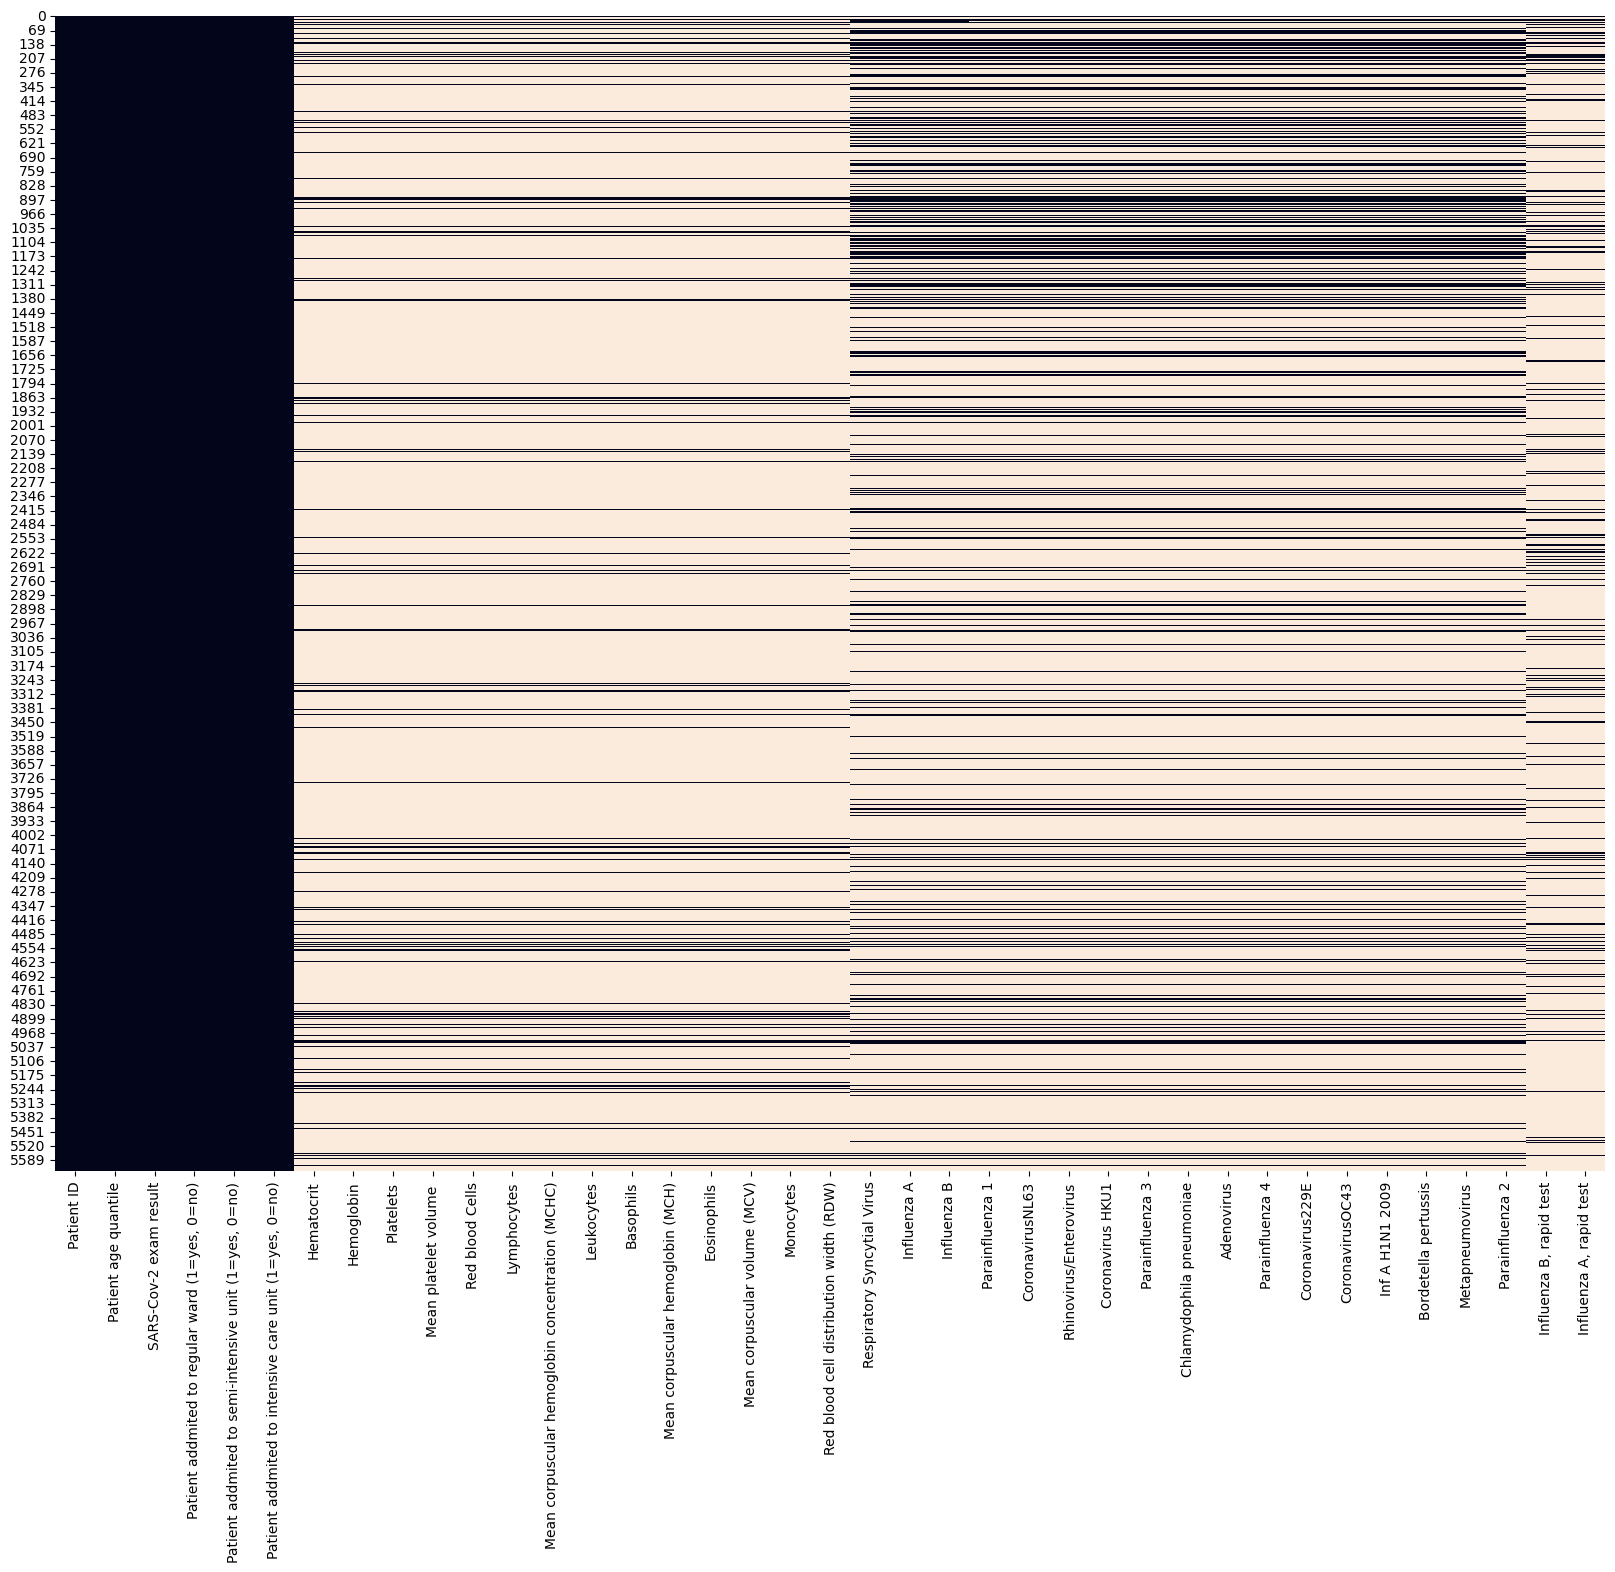

In [307]:
plt.figure(figsize=(20,15))
sns.heatmap(df.isna(), cbar=False)

In [308]:
df.drop(['Patient ID'], axis=1,inplace=True)

In [309]:
df

Patient age quantile SARS-Cov-2 exam result  \
0                       13               negative   
1                       17               negative   
2                        8               negative   
3                        5               negative   
4                       15               negative   
...                    ...                    ...   
5639                     3               positive   
5640                    17               negative   
5641                     4               negative   
5642                    10               negative   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903         0.578024   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
0             NaN                                               NaN   
1        0.318366                          

### 2. Examen de la colone Target

In [310]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)
# il est à constater ici que nos deux classe(positive, negative) ne sont pas équilibrées, il faudrait donc utiliser lors
# du training une metrique comme 'score F1', 'recall', ou 'precision'

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

### 3. Histogramme des variables continues

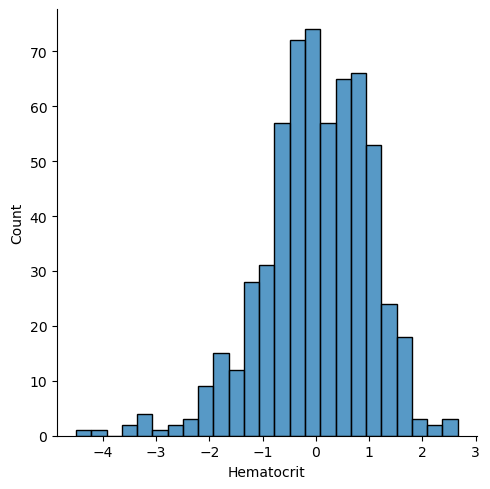

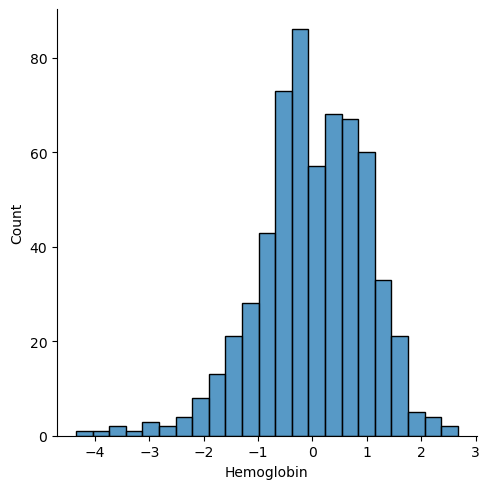

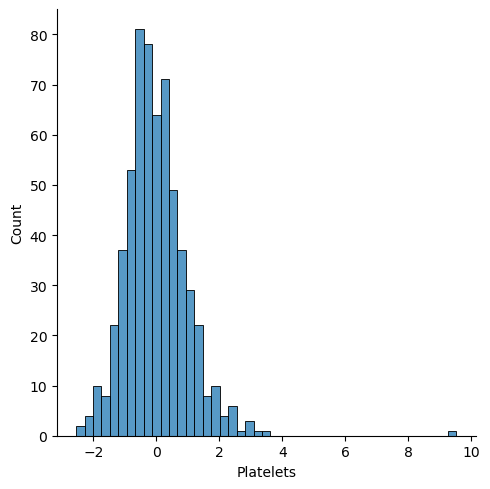

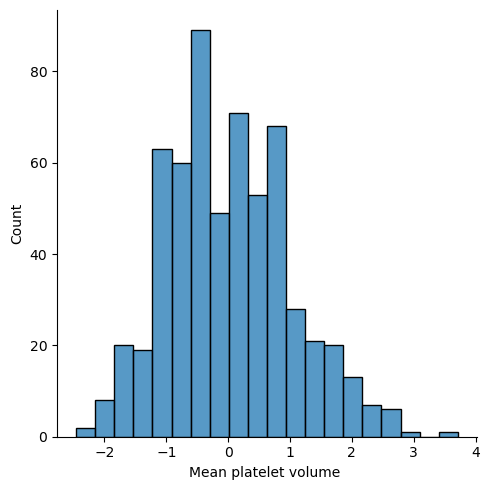

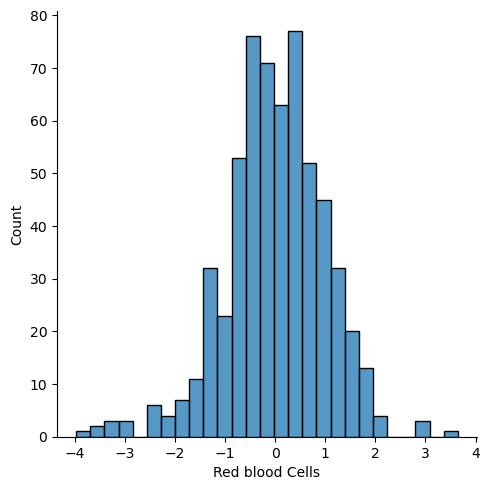

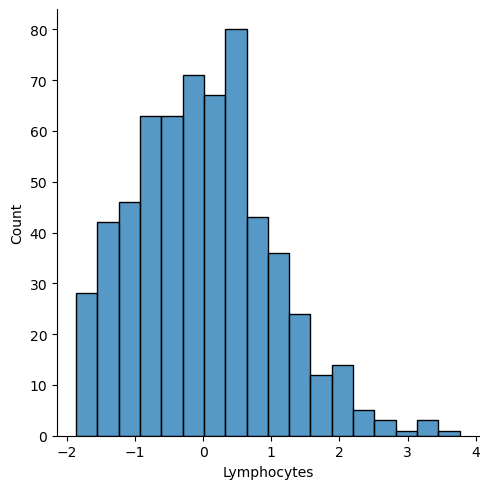

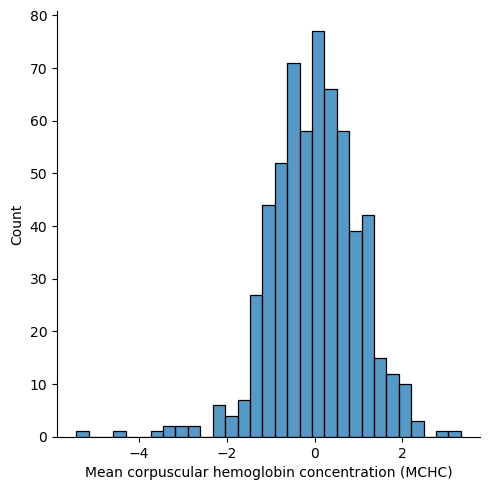

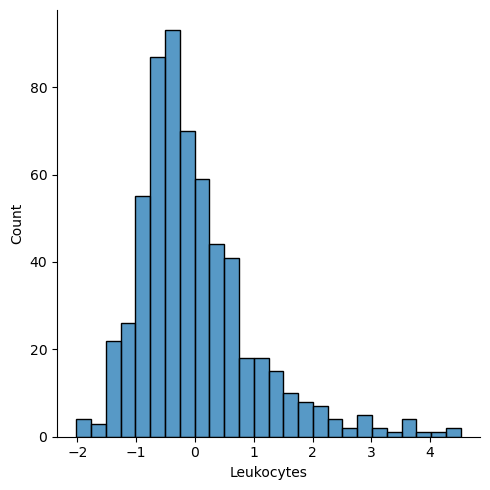

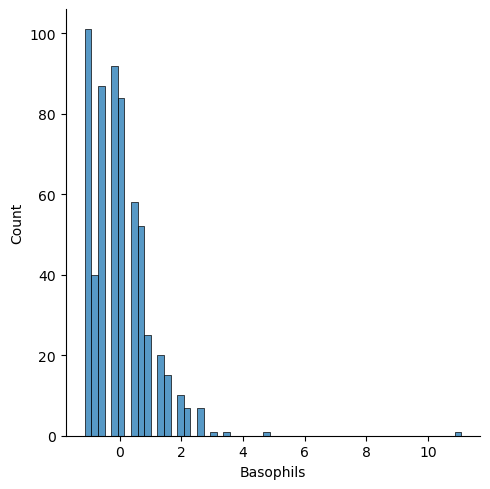

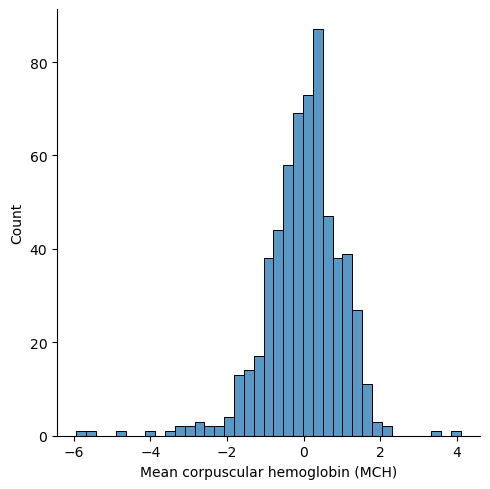

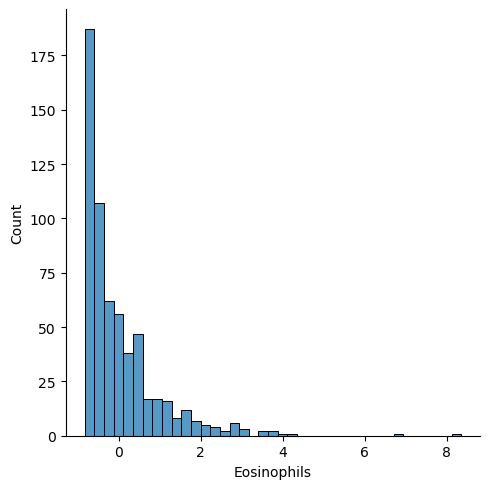

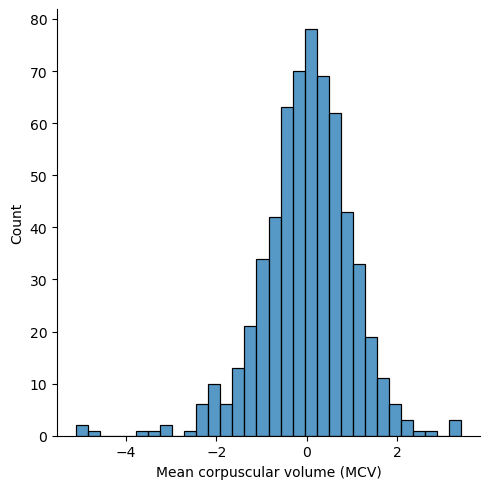

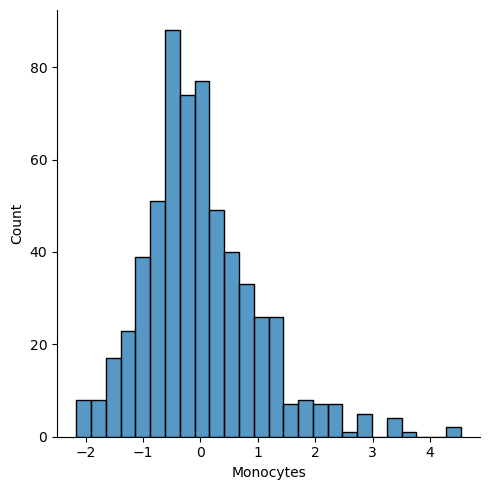

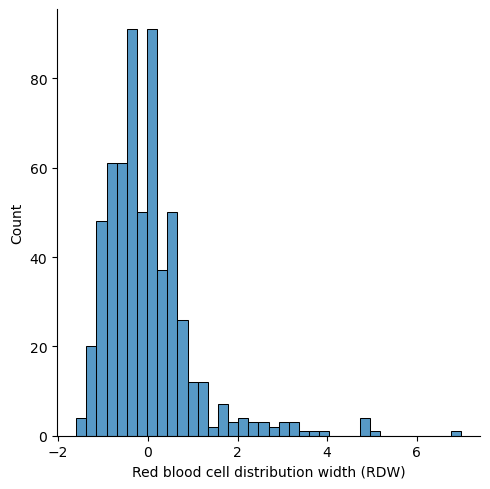

In [311]:
for col in df.select_dtypes('float'):
    sns.displot(df[col])

    #oubien

#for col in df.columns[df.dtypes=='float64']:
 #   sns.displot(df[col])

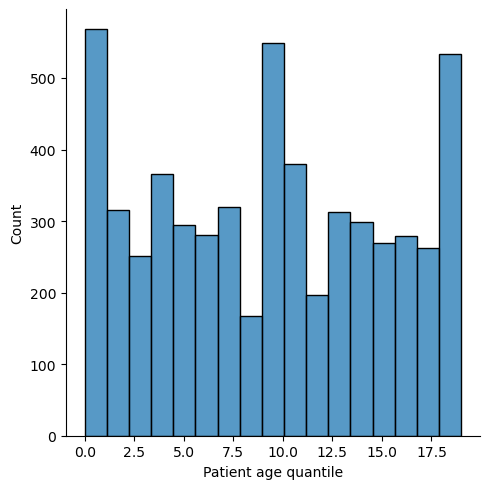

In [312]:
#Distribution de la colonne patient age quantile
sns.displot(df['Patient age quantile'])

### 4. Variables Qualitatives

In [313]:
df['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

In [314]:
for col in df.select_dtypes('object'):
    print (f'{col :-<60} {df[col].unique()}')

SARS-Cov-2 exam result-------------------------------------- ['negative' 'positive']
Respiratory Syncytial Virus--------------------------------- [nan 'not_detected' 'detected']
Influenza A------------------------------------------------- [nan 'not_detected' 'detected']
Influenza B------------------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1--------------------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63--------------------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus-------------------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1-------------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3--------------------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae------------------------------------ [nan 'not_detected' 'detected']
Adenovirus-------------------------------------------------- [nan 'not_detecte

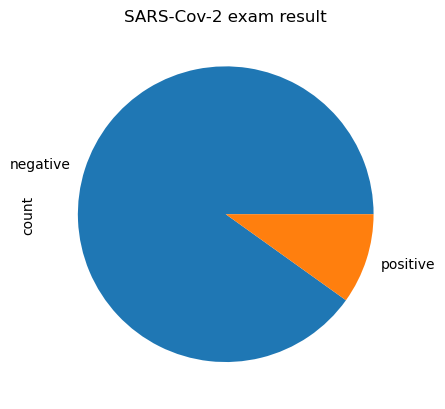

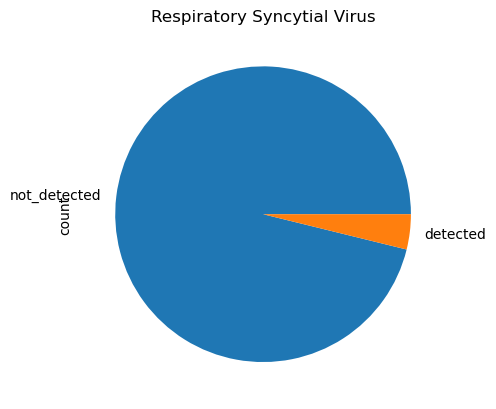

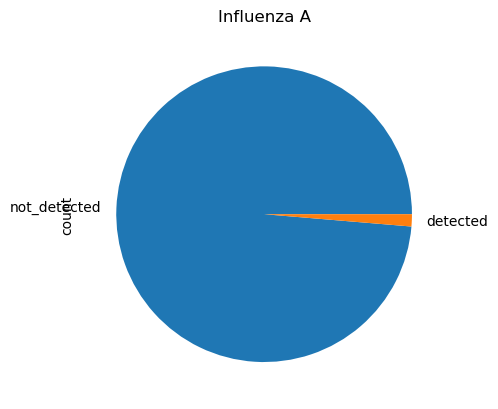

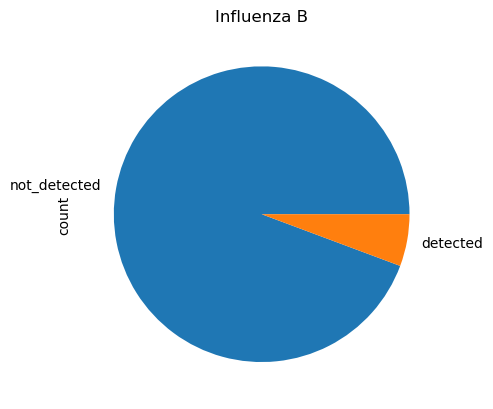

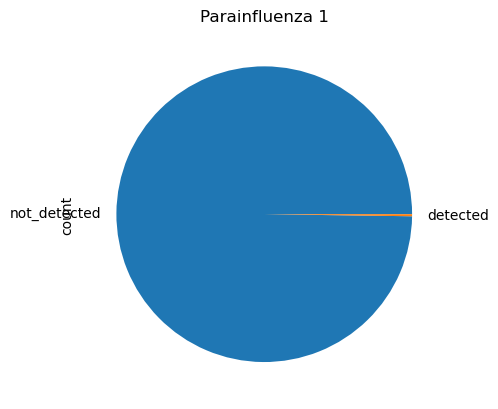

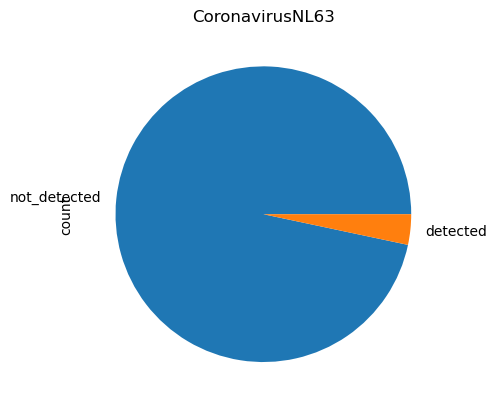

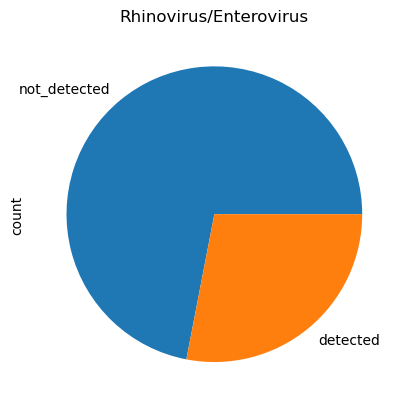

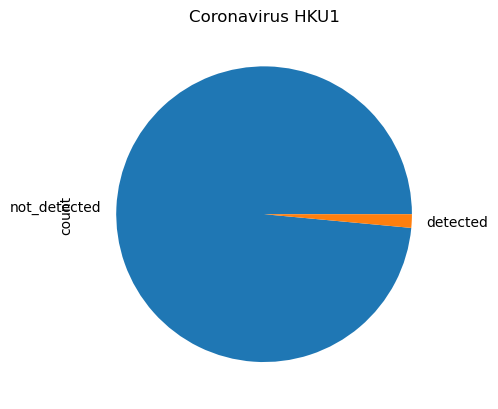

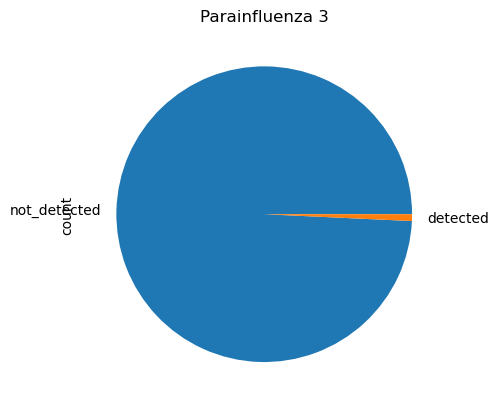

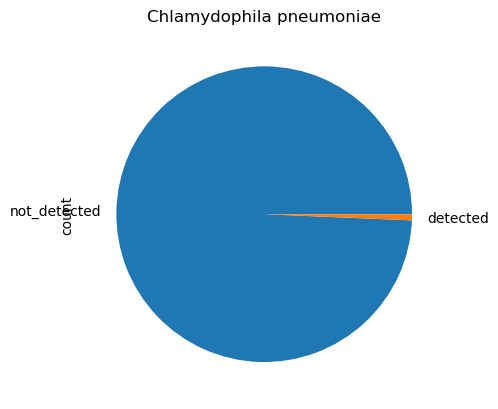

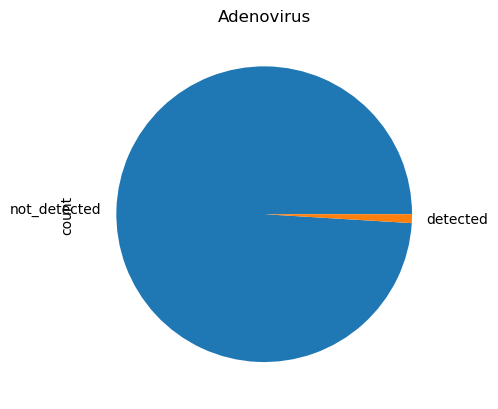

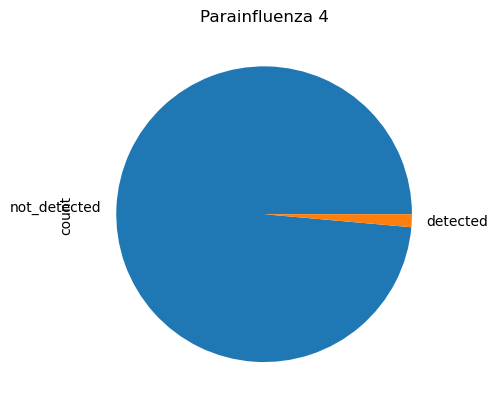

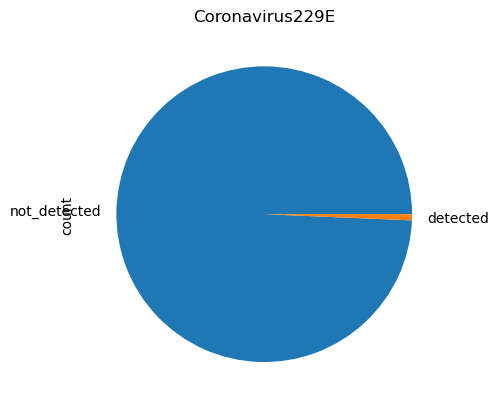

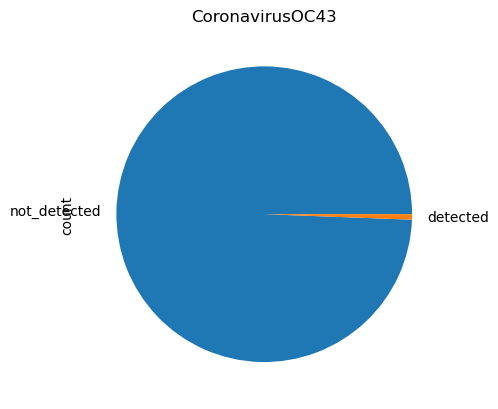

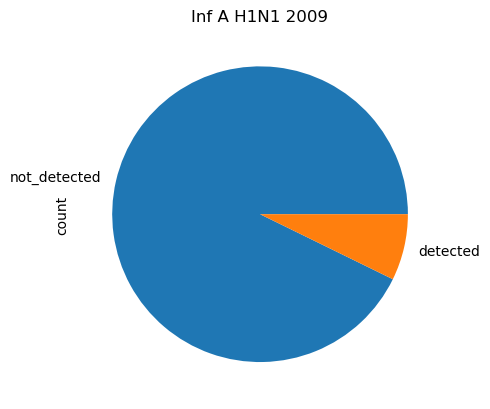

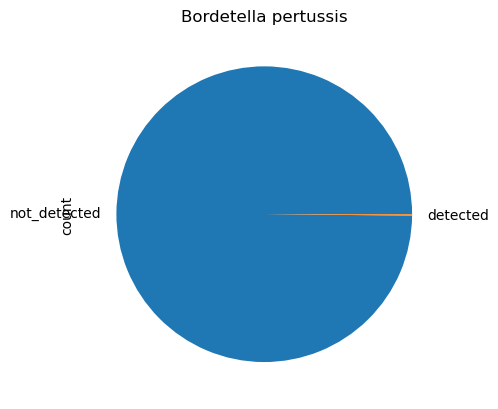

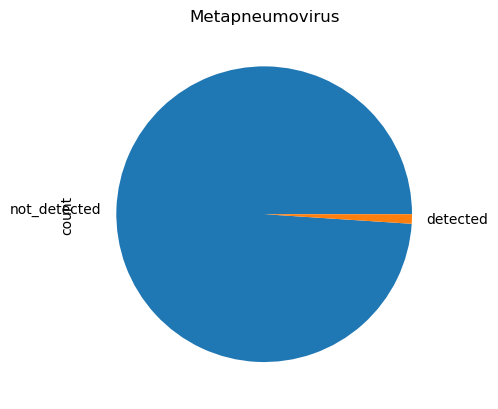

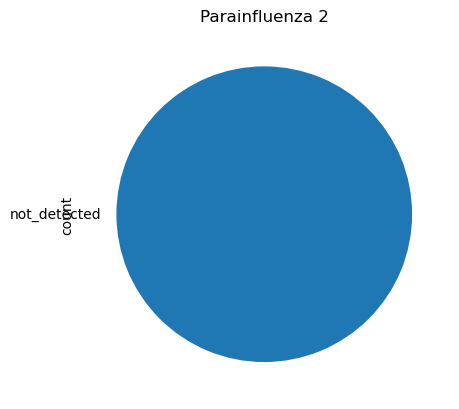

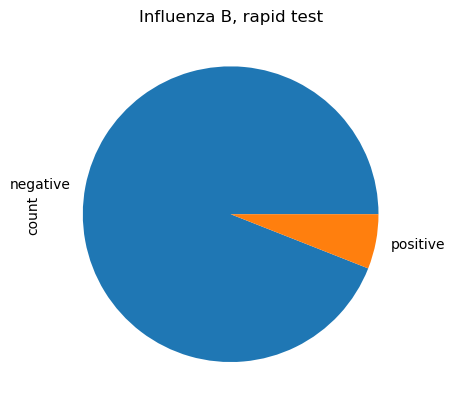

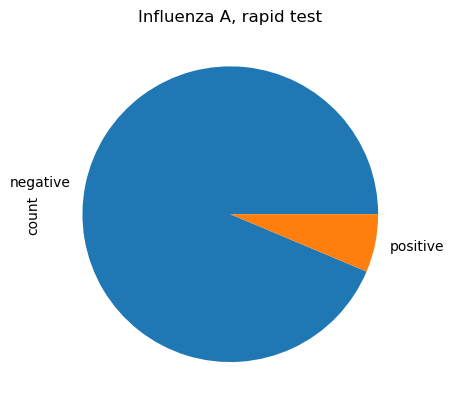

In [315]:
for col in df.select_dtypes('object'):
    plt.figure()
    plt.title(col)
    df[col].value_counts().plot.pie() # cette methode est de pandas
    #df[col].value_counts().plot(kind='pie') # une autre façon de le faire, c'est aussi de pandas

### 5. Relation Target / Variables

#### Création de sous-ensembles positifs et négatifs

In [316]:
positive_df = df[df['SARS-Cov-2 exam result'] =='positive']
#positive_df

In [317]:
negative_df = df[df['SARS-Cov-2 exam result'] =='negative']
#negative_df

#### Creation de sous-ensembles Blood et Viral

In [527]:
missing_rate = df.isna().sum()/df.shape[0]

In [528]:
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)] # donnes les colonnes de type test sanguin
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [405]:
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)] # les colonnes de type test virus
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

#### Target / Blood

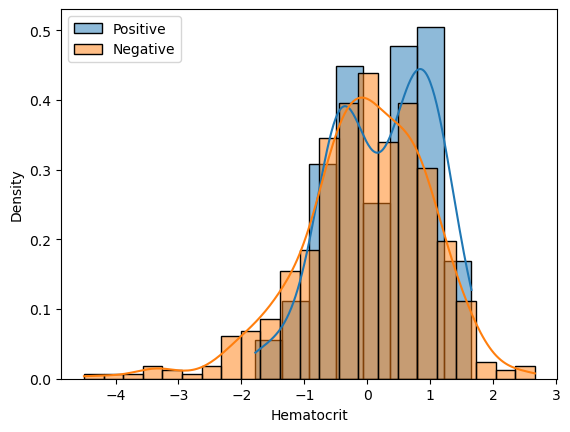

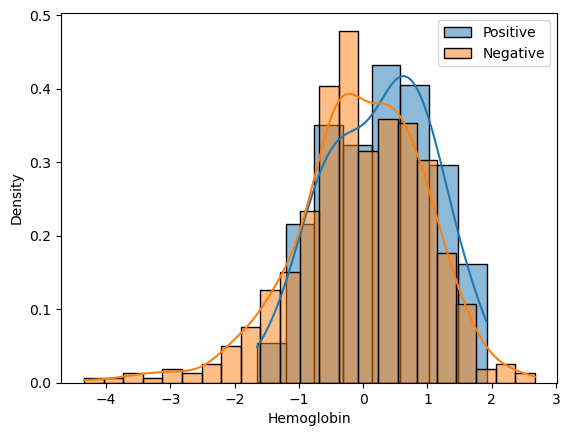

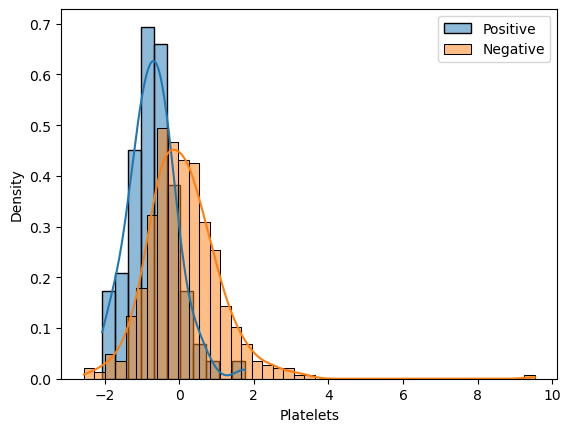

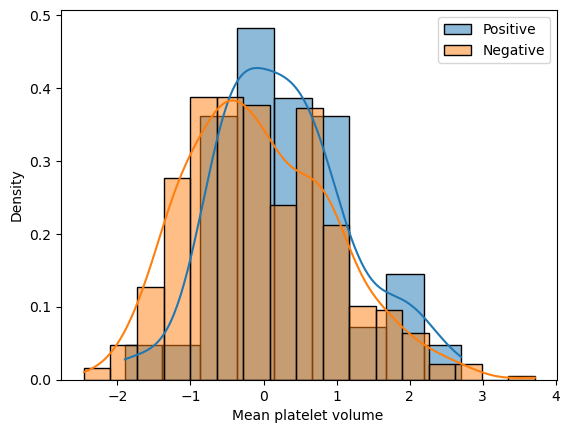

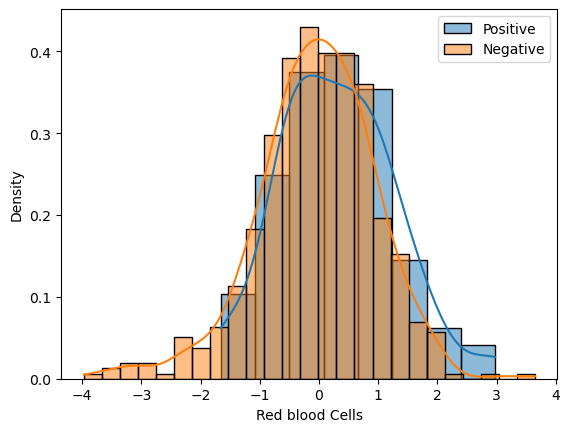

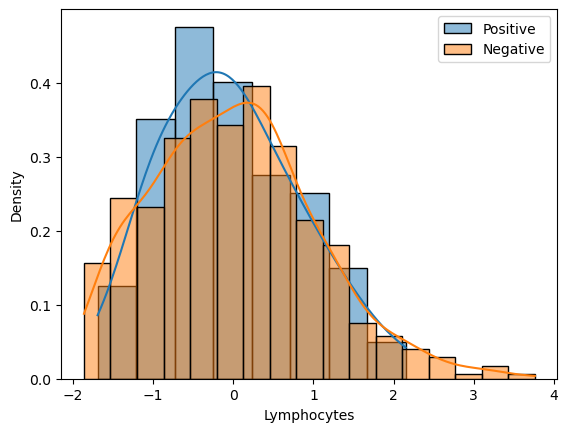

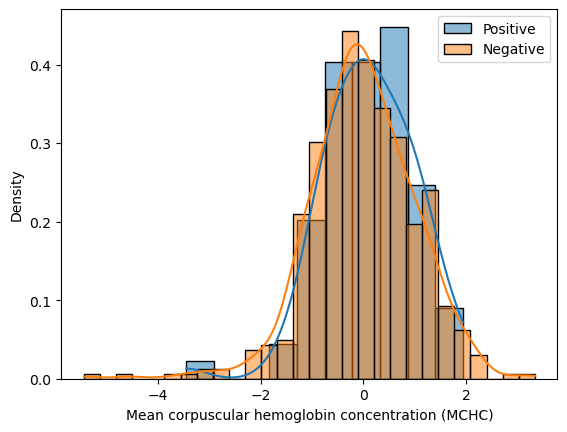

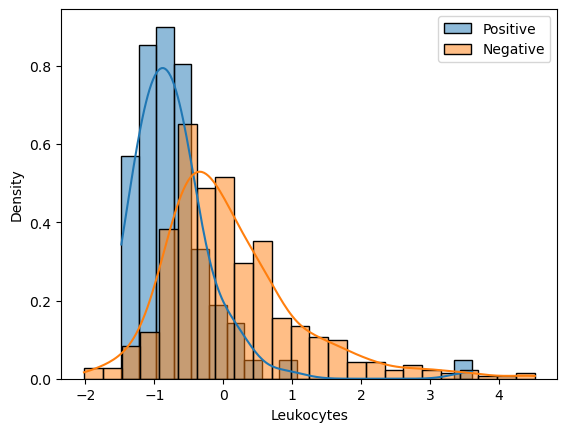

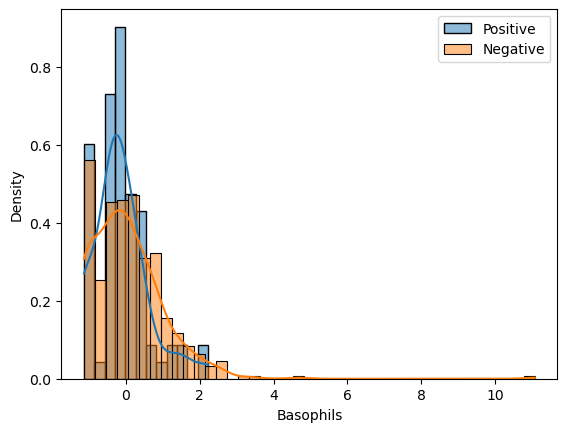

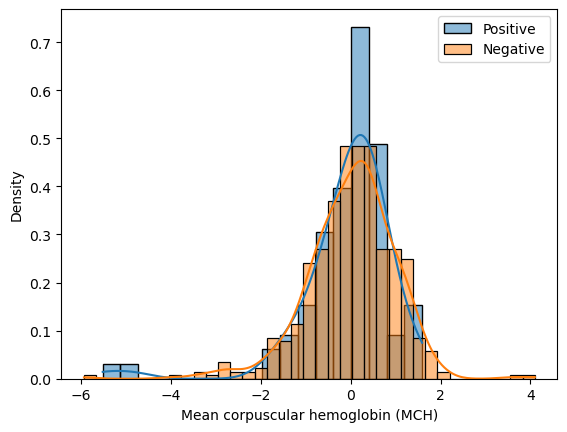

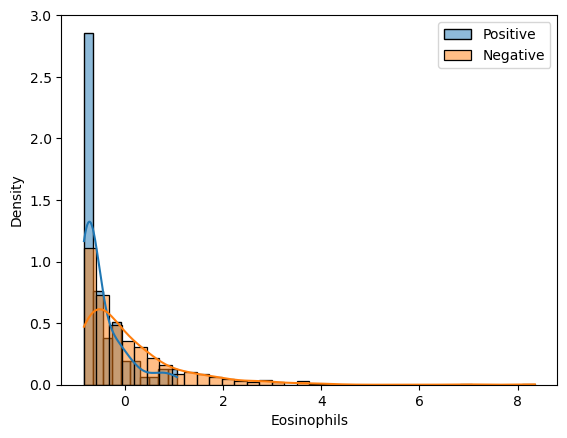

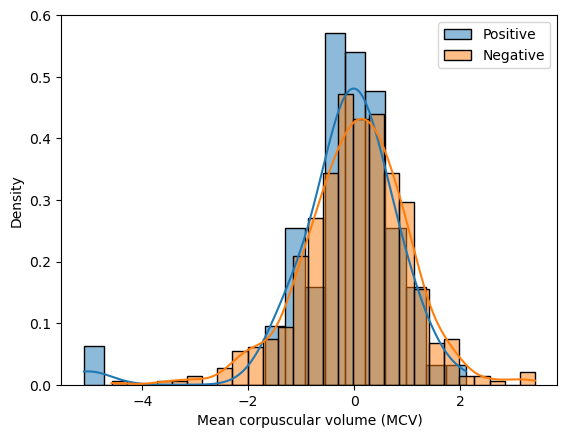

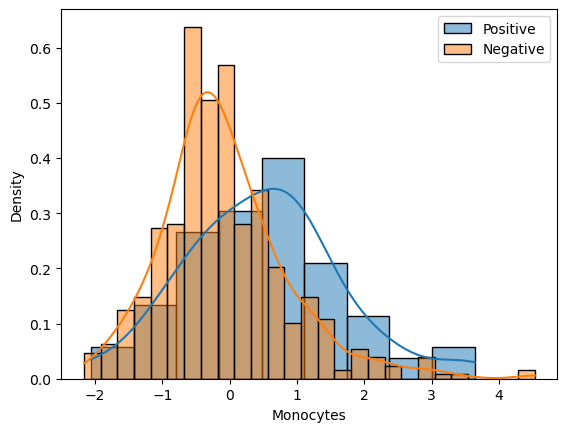

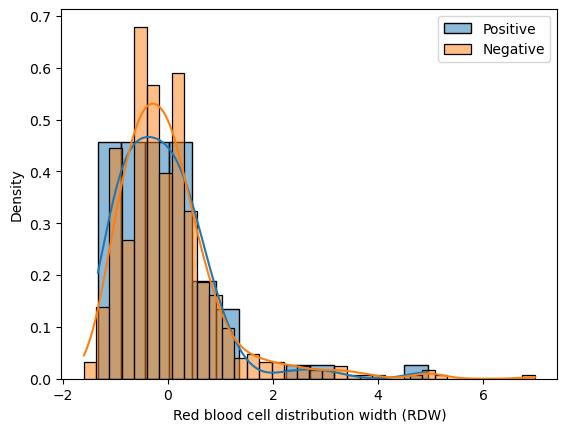

In [332]:
for col in blood_columns :  
    plt.figure()
    sns.histplot(positive_df[col], label='Positive',stat='density', kde=True)
    sns.histplot(negative_df[col], label='Negative', stat='density', kde=True)
    plt.legend()
    plt.show()
  
    
    # pour displot
#for col in blood_columns :  
#    sns.displot(positive_df[col], label='Positive')
#    plt.legend()
#    sns.displot(negative_df[col], label='Negative')
#    plt.legend()
#    plt.close() #cela doit venir après plt.show() pour eviter l'utilisation inutile de la memoire.
    
#ici on pouvait utiliser aussi la fonction sns.displot() mais sauf que par defaut celui ci cré une figure à chaque fois
# ne va donc pas afficher les deux sur la meme figure, plutot l'un par dessous l'autre(deux figure donc). il faut 
# donc l'écrire ajouté une legende après chaque displot() une legende. 


####  Target / age

<Axes: xlabel='Patient age quantile', ylabel='count'>

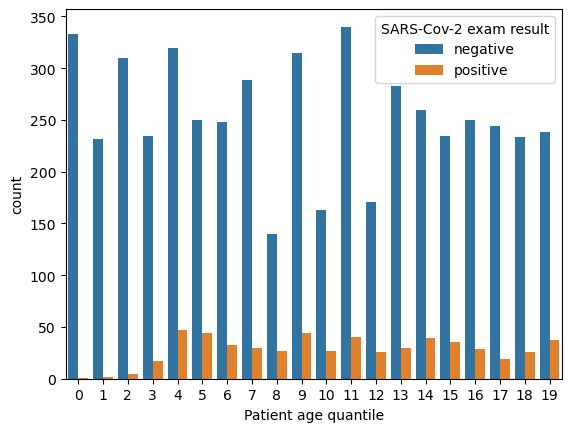

In [333]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

####  Target / Viral

In [334]:
#notre colonne target et les colonnes  viral_columns sont toutes de type categorie, alors pour une meilleurs visualisation 
# de la relation entre les colonnes de type categorie on utilise la fonction crosstab() de pandas.

In [337]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

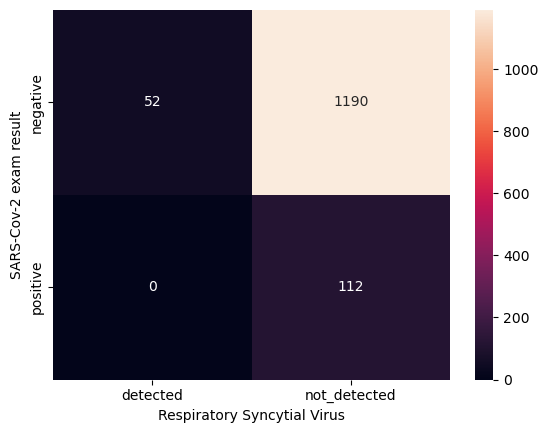

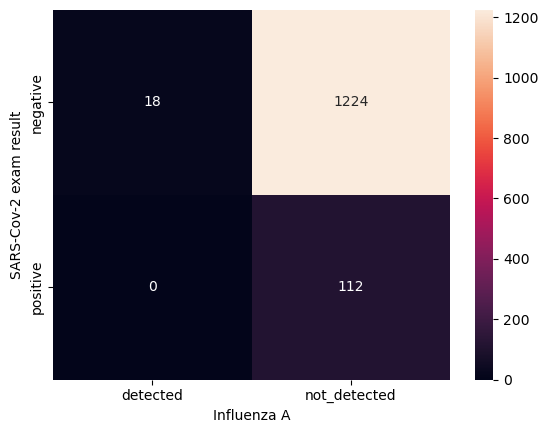

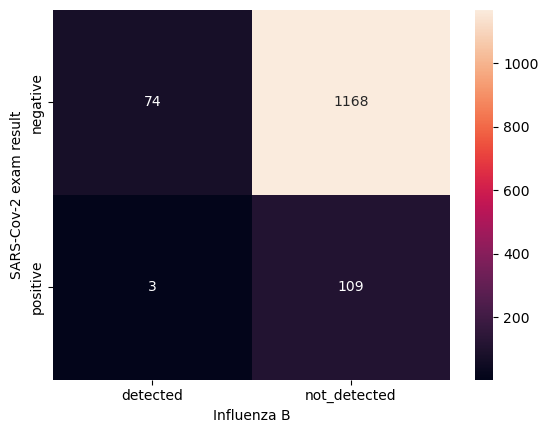

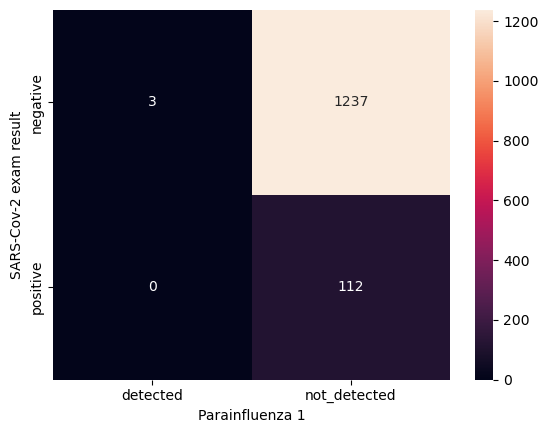

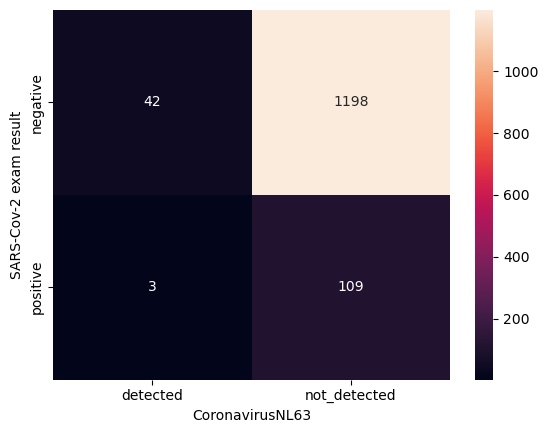

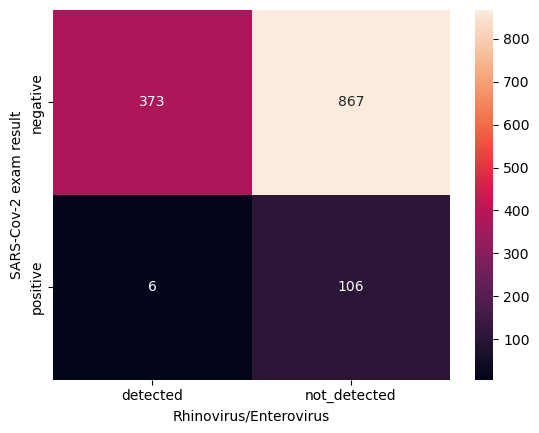

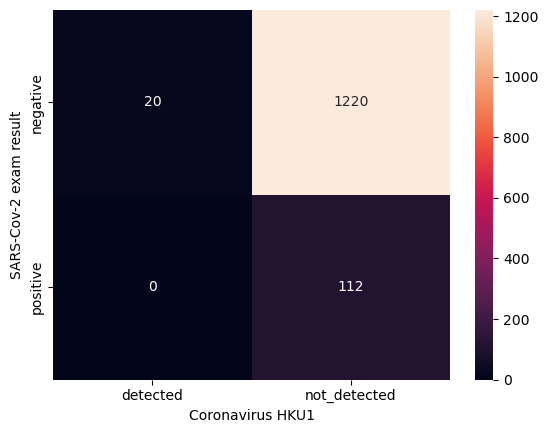

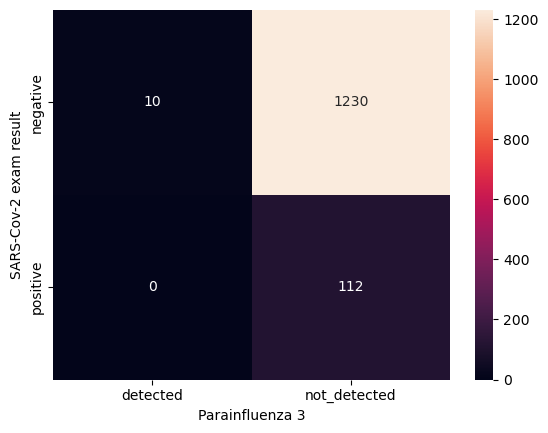

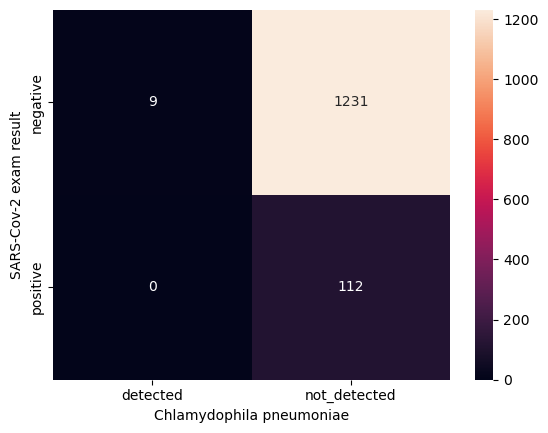

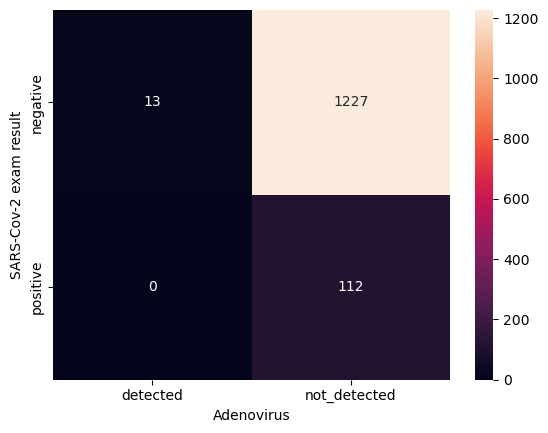

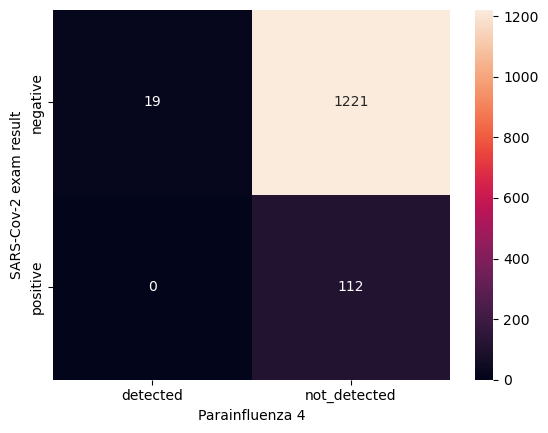

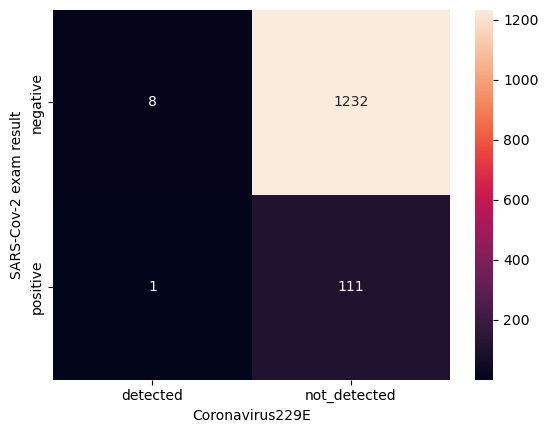

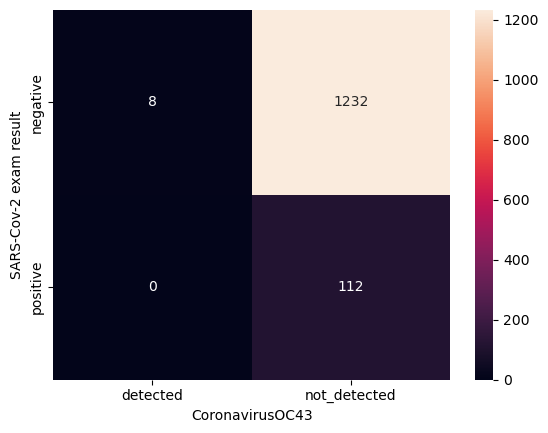

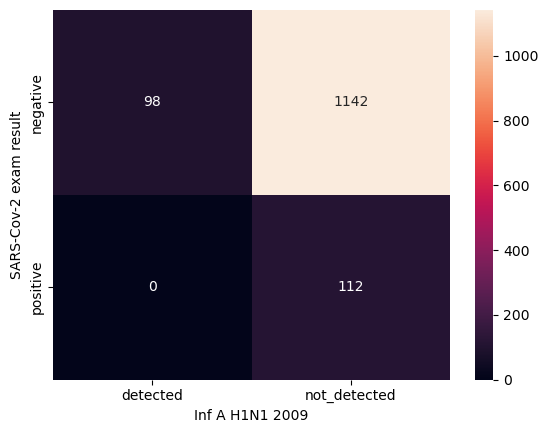

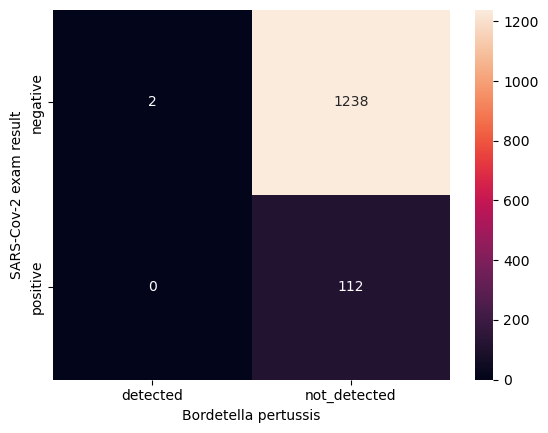

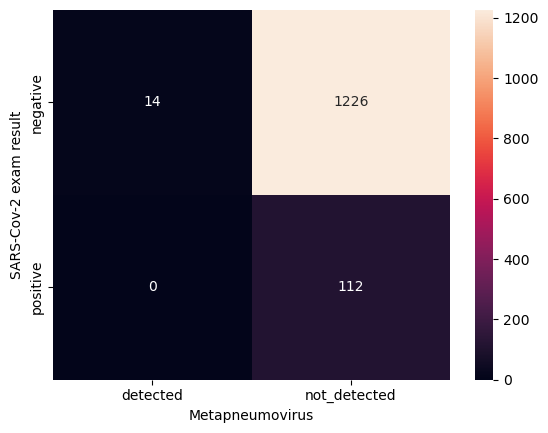

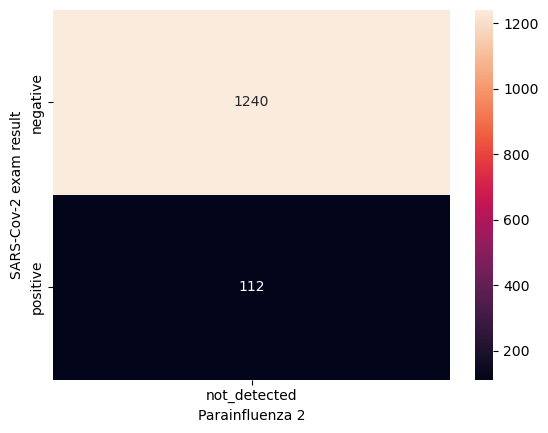

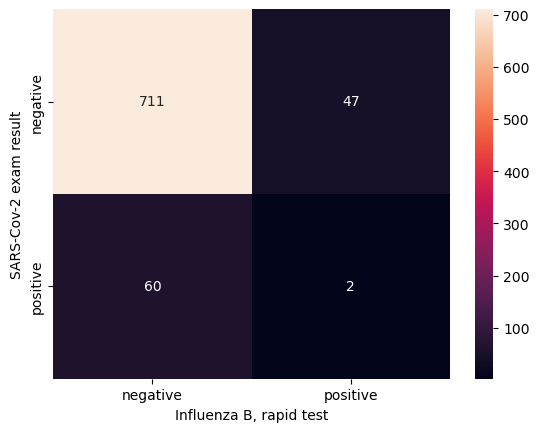

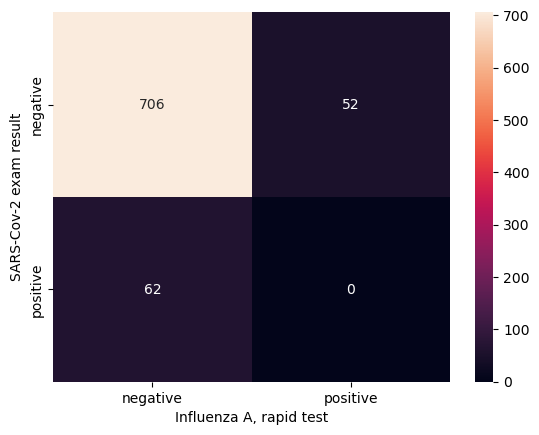

In [340]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

## 2. ANALYSE UN PEU PLUS AVANCE

## 2.1. Relation variable / variable

### Relation Taux Sanguin (blood_data / blood_data)

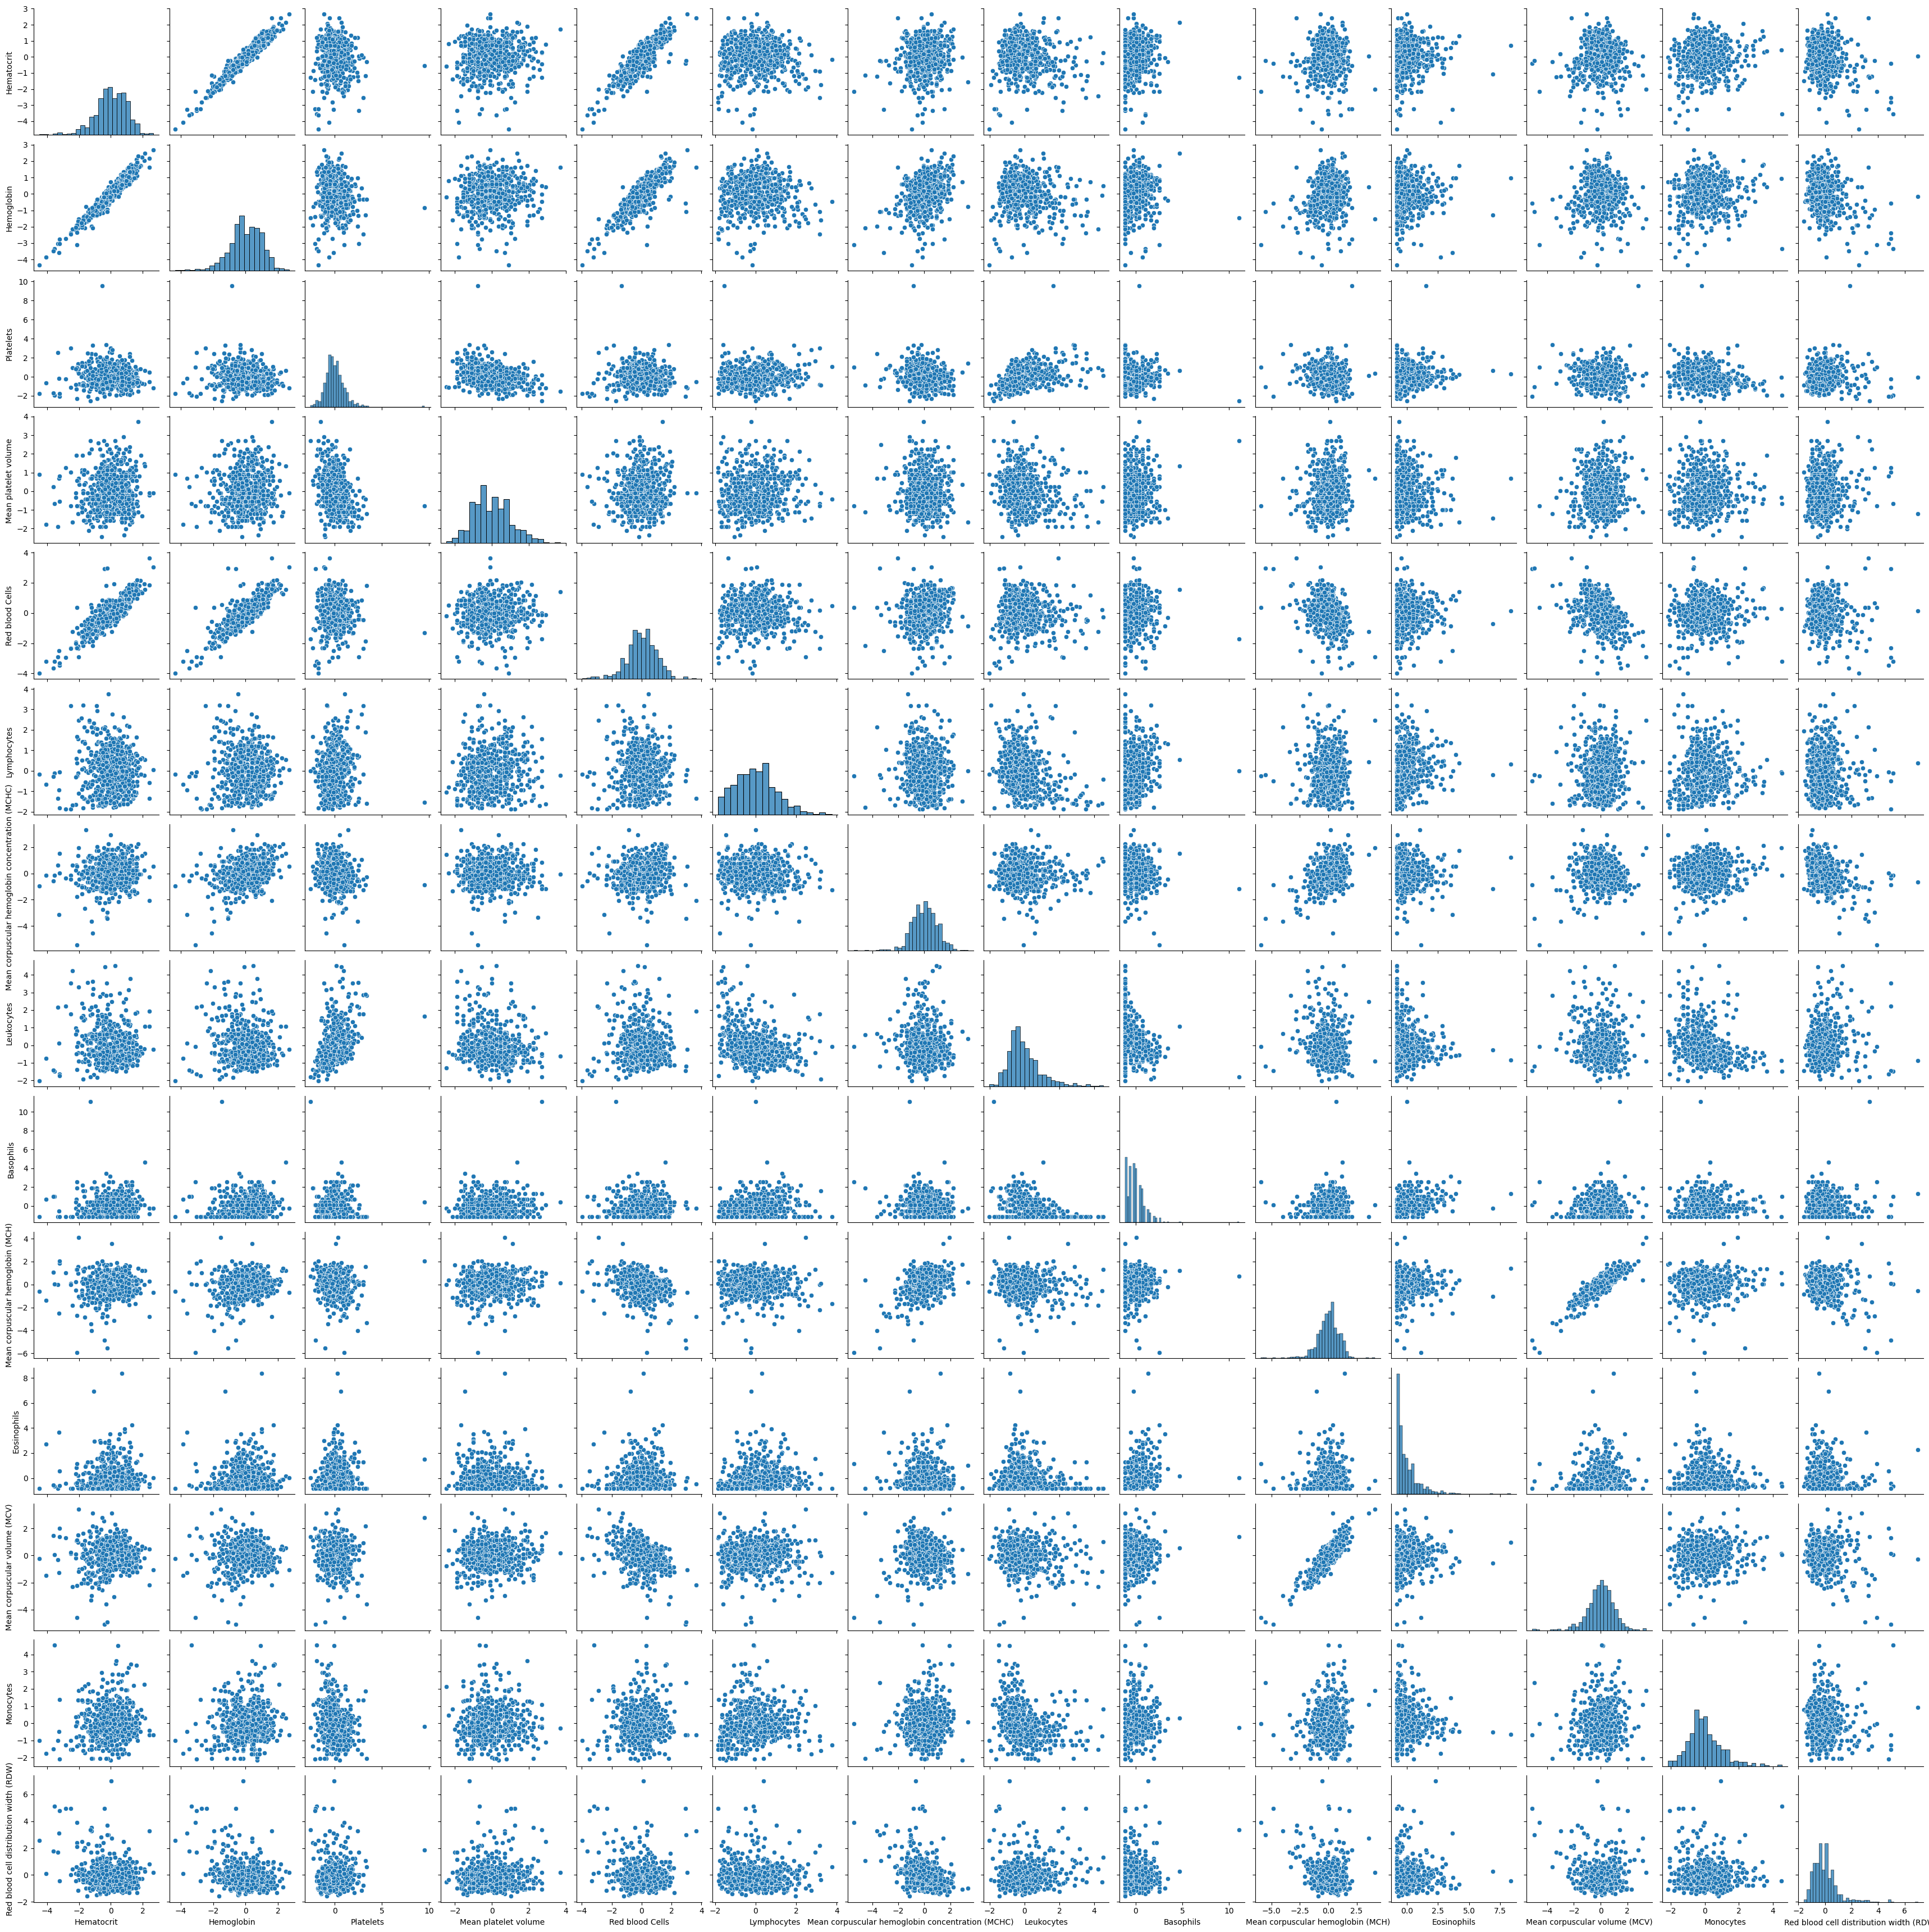

In [346]:
sns.pairplot(df[blood_columns])

<Axes: >

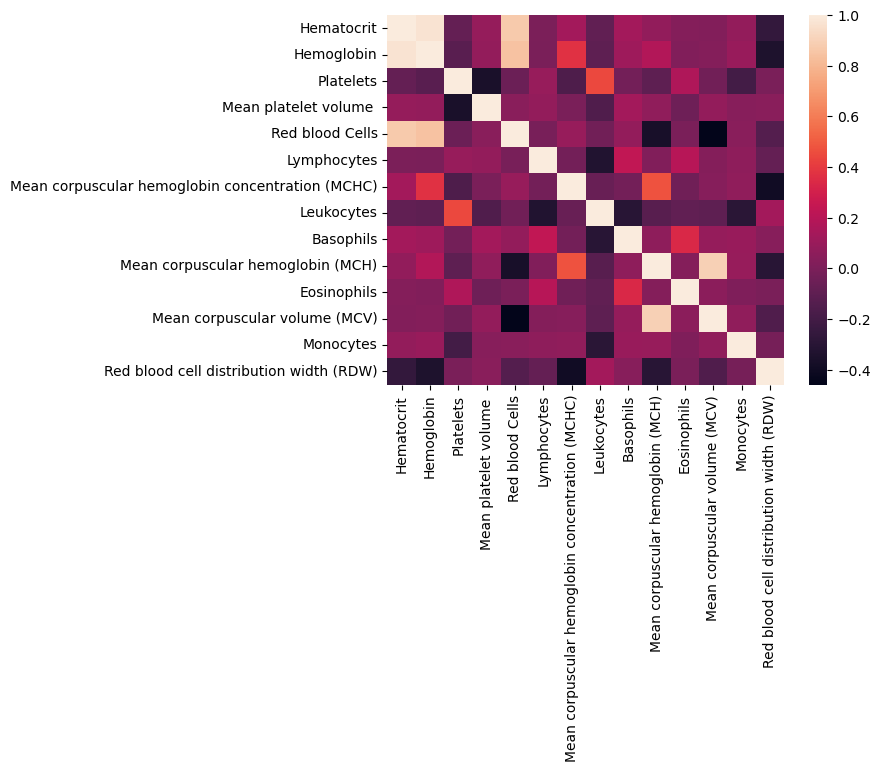

In [347]:
sns.heatmap(df[blood_columns].corr())

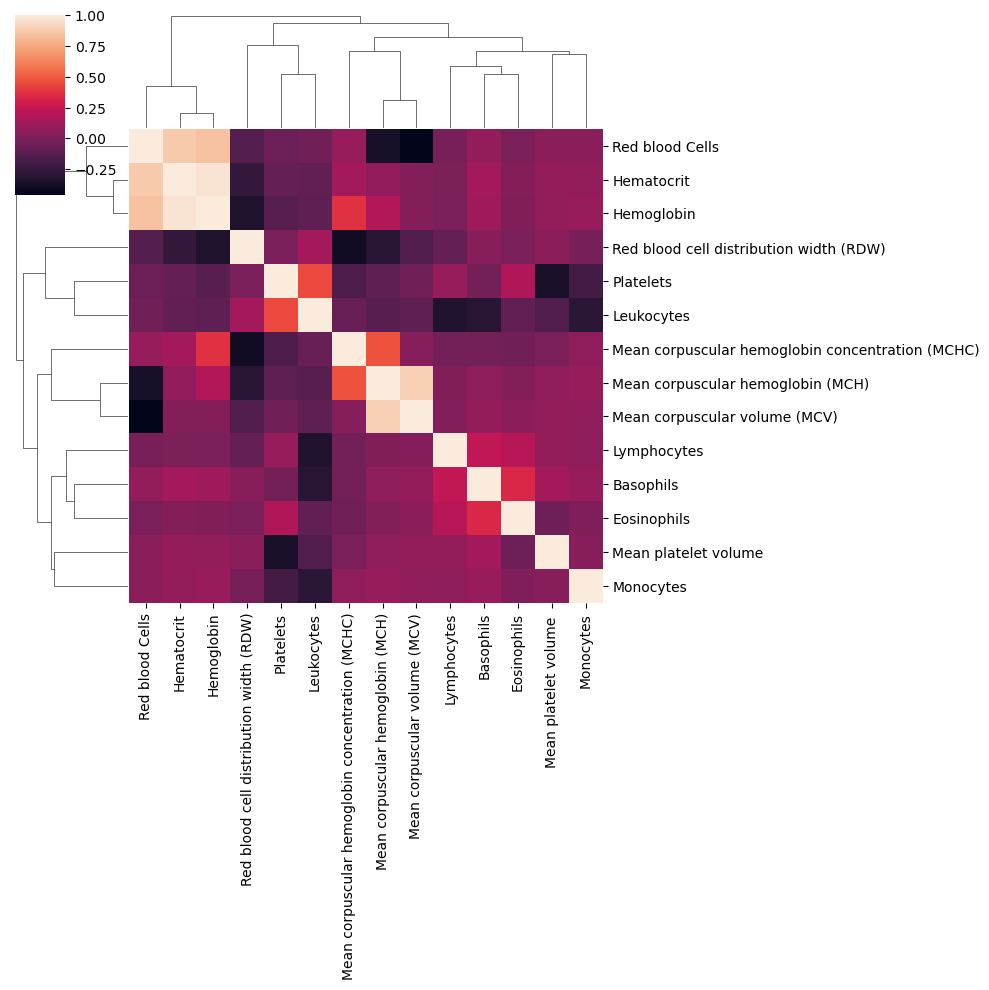

In [348]:
sns.clustermap(df[blood_columns].corr())

### Relation Age / Sang (blood_data / age)

<Figure size 640x480 with 0 Axes>

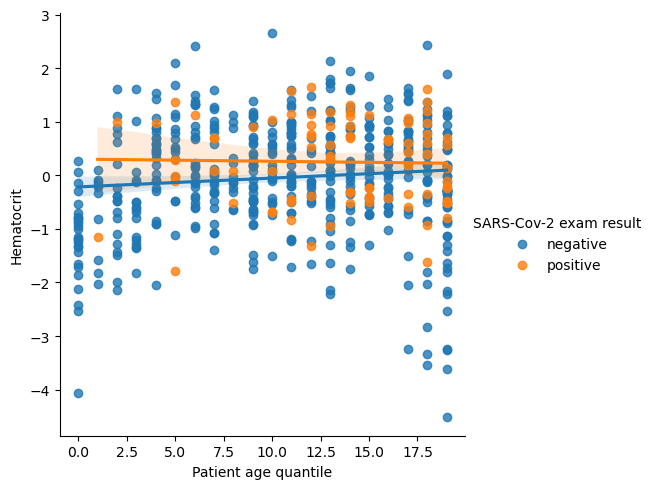

<Figure size 640x480 with 0 Axes>

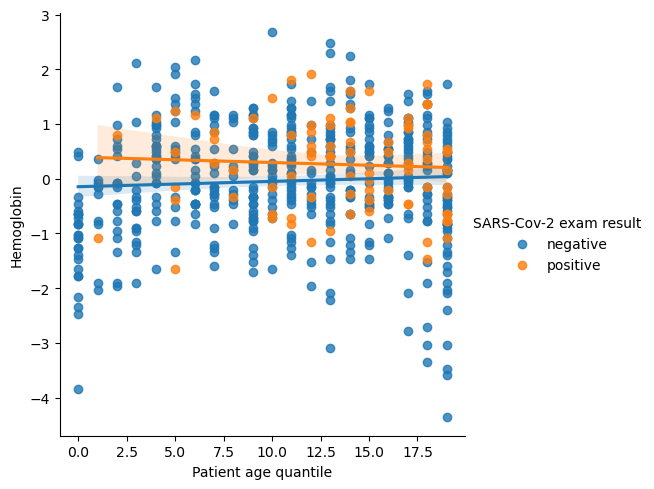

<Figure size 640x480 with 0 Axes>

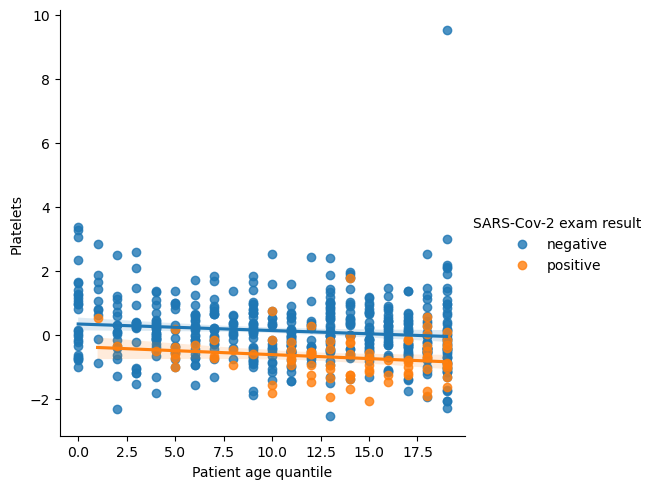

<Figure size 640x480 with 0 Axes>

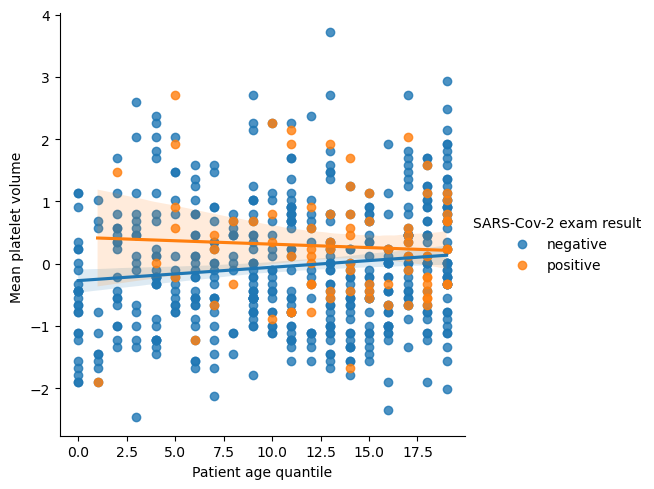

<Figure size 640x480 with 0 Axes>

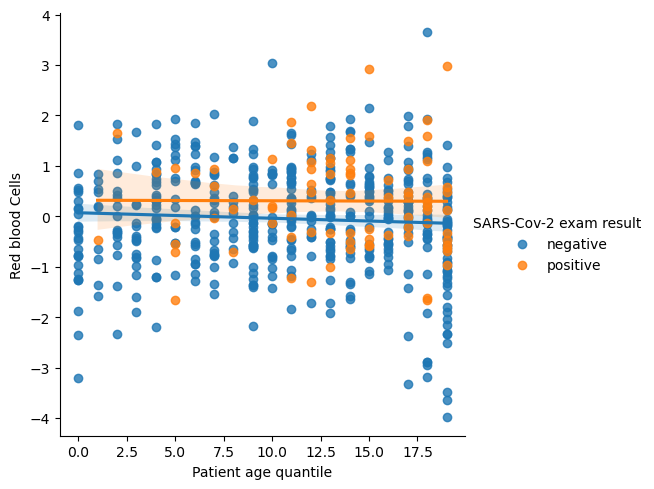

<Figure size 640x480 with 0 Axes>

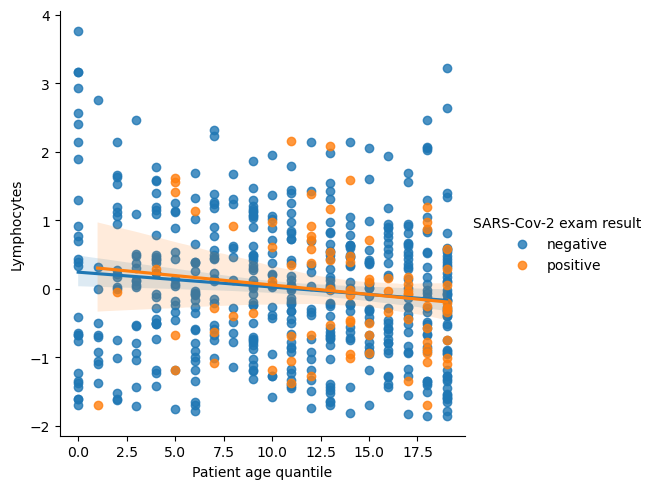

<Figure size 640x480 with 0 Axes>

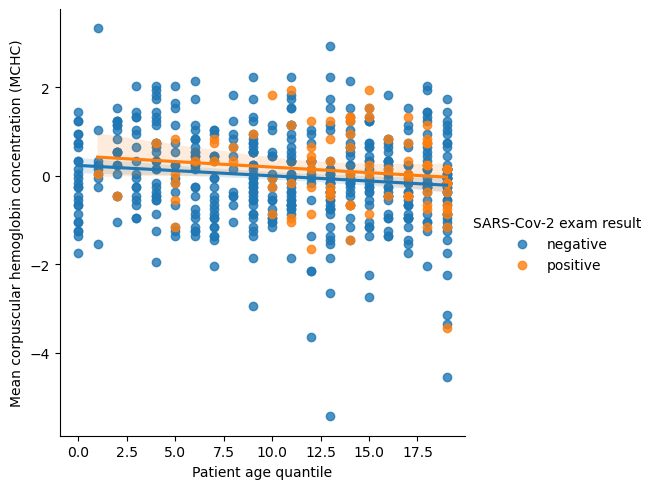

<Figure size 640x480 with 0 Axes>

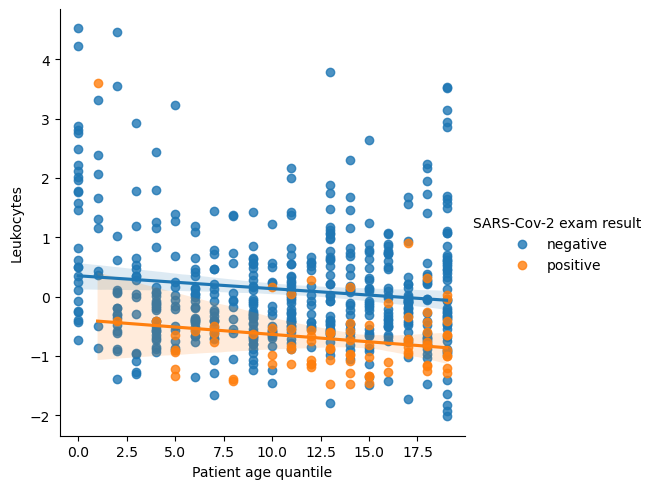

<Figure size 640x480 with 0 Axes>

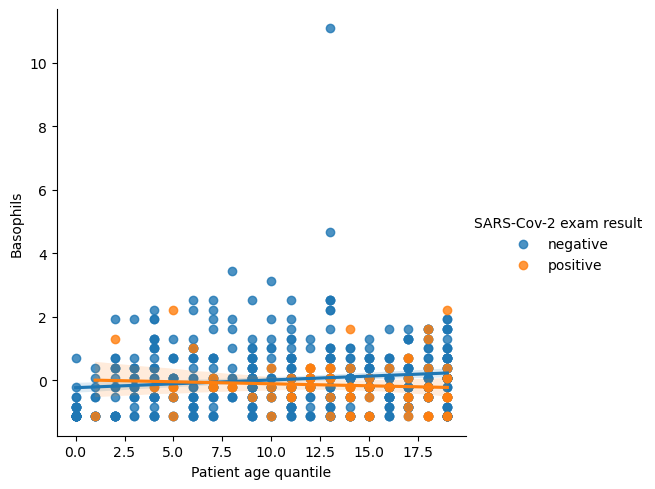

<Figure size 640x480 with 0 Axes>

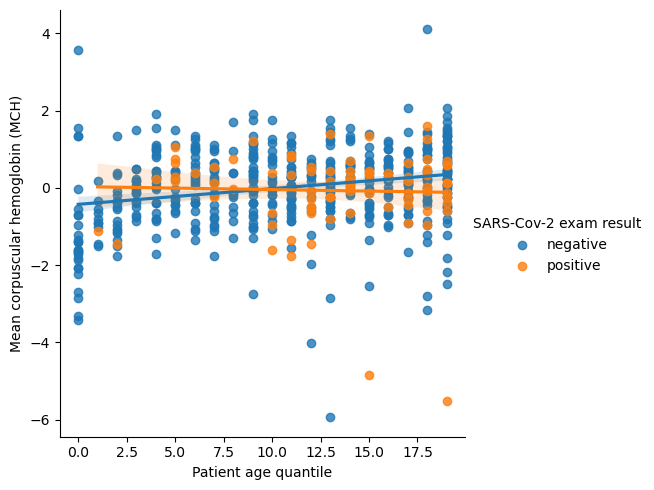

<Figure size 640x480 with 0 Axes>

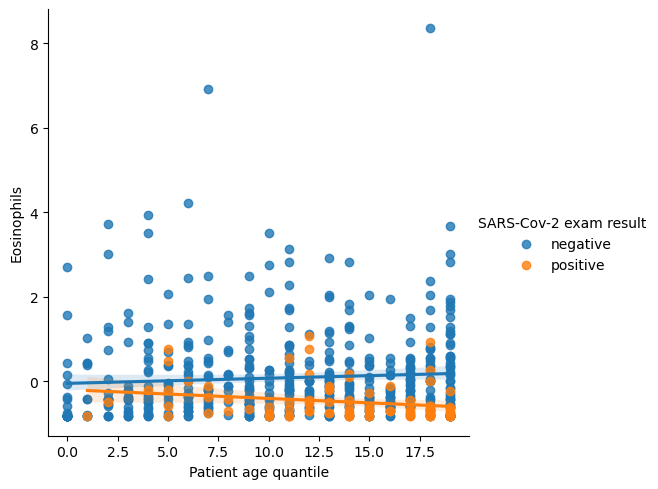

<Figure size 640x480 with 0 Axes>

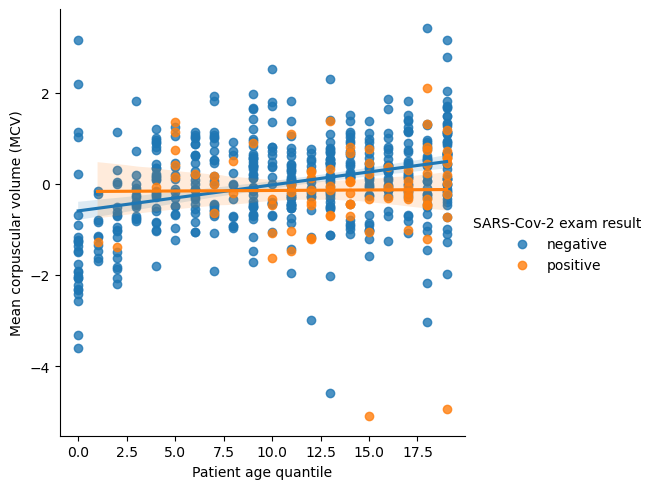

<Figure size 640x480 with 0 Axes>

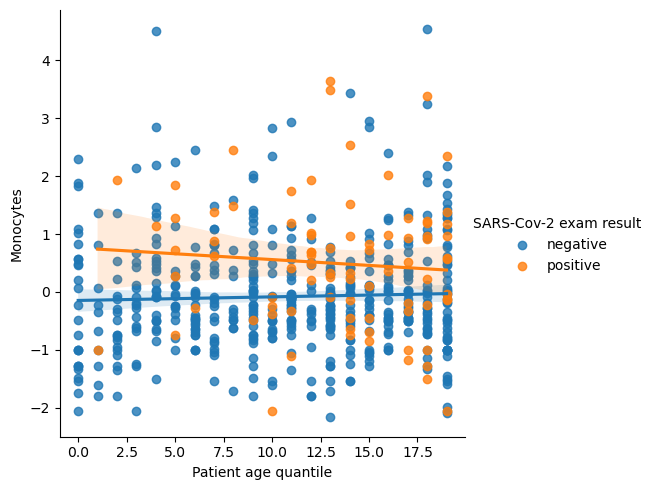

<Figure size 640x480 with 0 Axes>

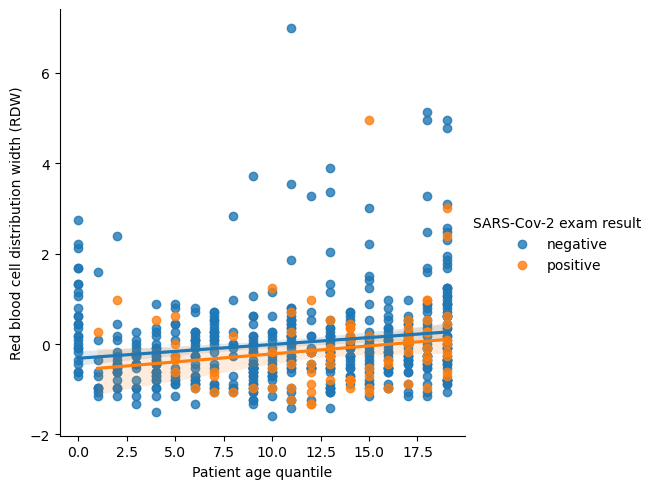

In [352]:
for col in blood_columns : 
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)
    plt.show()
    
    plt.close()


# La fonction sns.lmplot() de Seaborn crée un graphique de régression linéaire pour visualiser la relation entre deux 
#variables numériques en traçant une droite de régression. plus les deux variables sont coorélées plus la nuage de points
# va etre sur la droite.

In [490]:
df3 = df.drop(df.select_dtypes('object'), axis=1)
df3.corr()
# la coorelation ne marche qu'avec les variable quantitative. df.corr() n'allait pas marcher, car il contient des variable
# qualitative(de type object)

Patient age quantile  \
Patient age quantile                                            1.000000   
Patient addmited to regular ward (1=yes, 0=no)                  0.046166   
Patient addmited to semi-intensive unit (1=yes,...              0.015736   
Patient addmited to intensive care unit (1=yes,...             -0.035772   
Hematocrit                                                      0.096808   
Hemoglobin                                                      0.060320   
Platelets                                                      -0.158683   
Mean platelet volume                                            0.119449   
Red blood Cells                                                -0.037510   
Lymphocytes                                                    -0.125935   
Mean corpuscular hemoglobin concentration (MCHC)               -0.124671   
Leukocytes                                                     -0.166386   
Basophils                                                       0.107525   
Mean corpuscular hemoglobin (MCH)                               0.197394   
Eosinophils                                                     0.022085   
Mean corpuscular volume (MCV)                                   0.281655   
Monocytes                                                       0.050962   
Red blood cell distribution width (RDW)                         0.166429   
est malade                                                     -0.090915   

                                                    Patient addmited to regular ward (1=yes, 0=no)  \
Patient age quantile                                                                      0.046166   
Patient addmited to regular ward (1=yes, 0=no)                                            1.000000   
Patient addmited to semi-intensive unit (1=yes,...                                       -0.011264   
Patient addmited to intensive care unit (1=yes,...                                       -0.010192   
Hematocrit                                                                               -0.087241   
Hemoglobin                                                                               -0.091867   
Platelets                                                                                -0.183091   
Mean platelet volume                                                                     -0.013134   
Red blood Cells                                                                          -0.053143   
Lymphocytes                                                                              -0.095313   
Mean corpuscular hemoglobin concentration (MCHC)                                         -0.034642   
Leukocytes                                                                               -0.103005   
Basophils                                                                                 0.031833   
Mean corpuscular hemoglobin (MCH)                                                        -0.050703   
Eosinophils                                                                              -0.085636   
Mean corpuscular volume (MCV)                                                            -0.039326   
Monocytes                                                                                -0.000354   
Red blood cell distribution width (RDW)                                                   0.102160   
est malade                                                                                0.033632   

                                                    Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient age quantile                                                                         0.015736       
Patient addmited to regular ward (1=yes, 0=no)                                              -0.011264       
Patient addmited to semi-intensive unit (1=yes,...                                           1.000000       
Patient addmited to intensive care unit (1=yes,...    

In [401]:
df2.corr()['Patient age quantile'].sort_values()
# il renvoit la coorelation des variable quantitatives puis selectionne pour celui de la colonne 'Patient age quantile'
# et trie le resultat par ordre croissant.

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

### Relation Viral / Viral

#### Relation Influenza et rapide test

In [404]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [406]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

### Relation  Viral / Sanguin  (maladie / blood_data)

#### Création d'une nouvelle variable 'est malade' d'abord

In [437]:
np.sum(df[viral_columns[:-2]] == 'detected', axis=1) >= 1
# viral_columns est une liste des colonnes liées au virus.
# cette ligne selectionne touts les élements de cette liste à l'exception des deux derniers
#('Influenza B, rapid test','Influenza A, rapid test', car ils sont pas important) et compare ainsi le dataframe de ces 
#colonnes à 'detected' pour obtenir un tableau boolean ou les element correspondant à 'detected' sont à true et  les autre
#à false. et on fait la somme de ces elements true(retrouvés dans les colonnes) pour chaque ligne. sachant que chaque ligne
#represente les données clinique d'une personne, cela nous permet donc de savoir si une personne souffre de un ou 
#plusieurs maladie virales.

0       False
1        True
2       False
3       False
4        True
        ...  
5639    False
5640    False
5641    False
5642    False
5643    False
Length: 5644, dtype: bool

In [420]:
df['est malade'] = np.sum(df[viral_columns[:-2]] == 'detected', axis=1) >= 1
df.head()

#ajout de la colonne 'est malade' au dataframe

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [424]:
malade_df = df[df['est malade'] == True]
non_malade_df = df[df['est malade'] == False]
# à partir de la colonne 'est malade' on crée deux sous ensembles pour les personnes malades et non malades

#### Relation maintenant

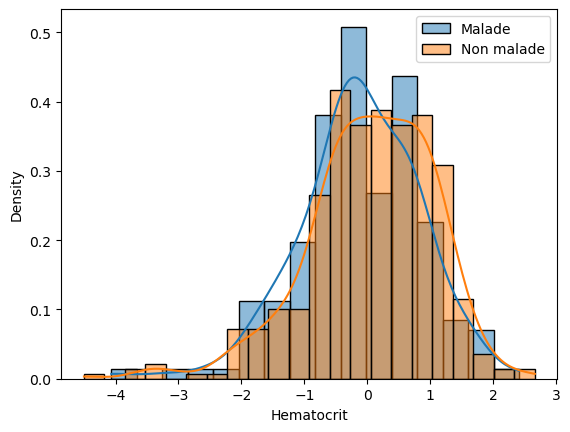

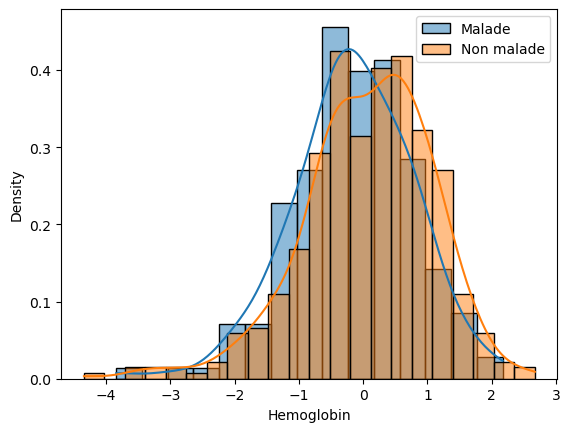

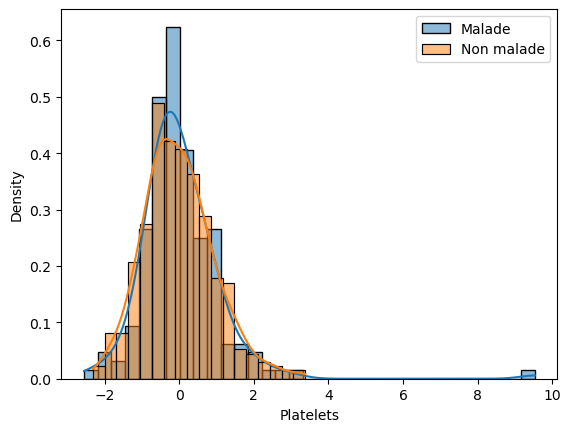

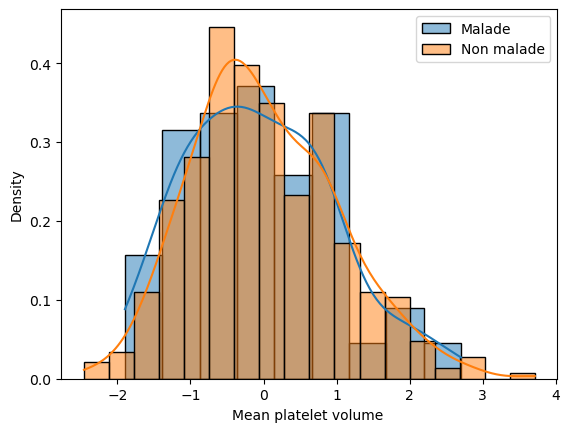

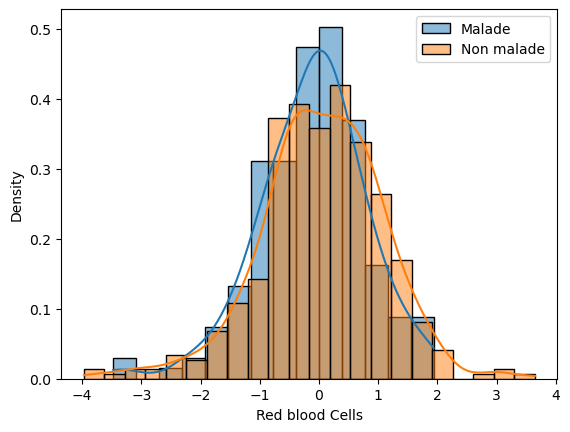

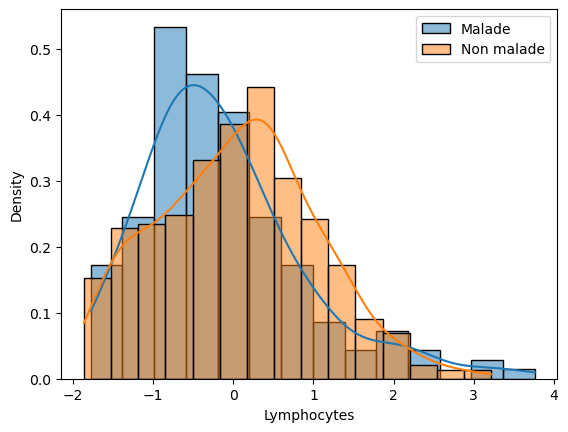

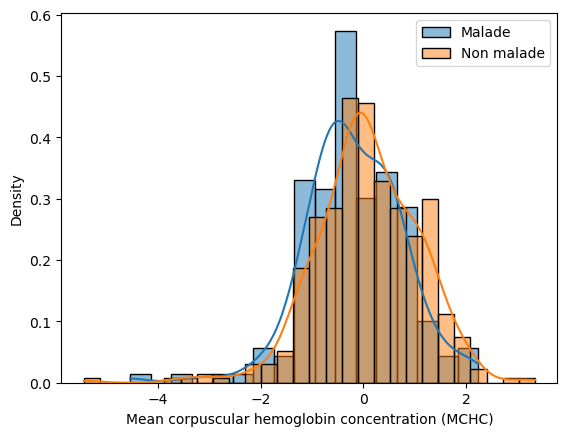

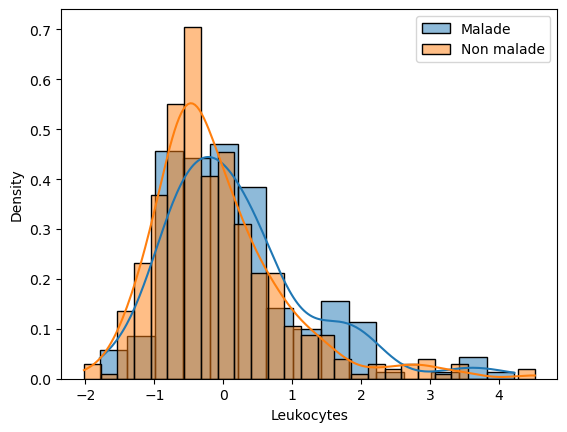

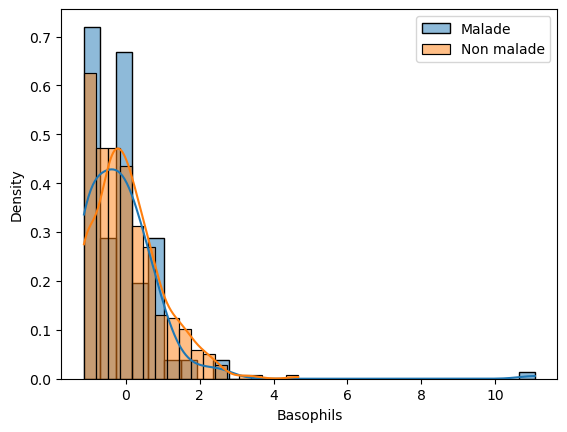

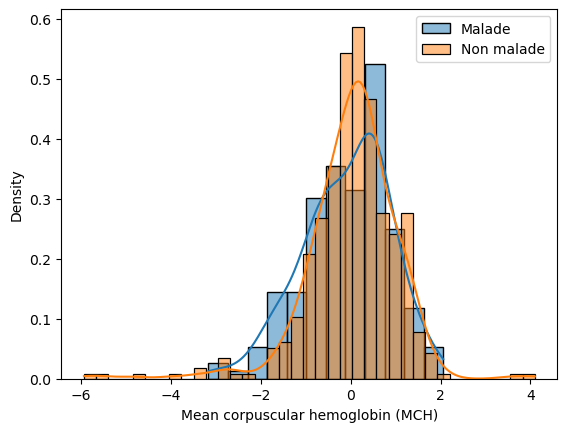

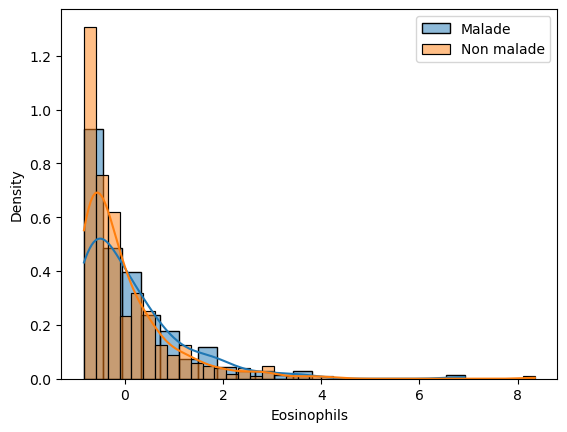

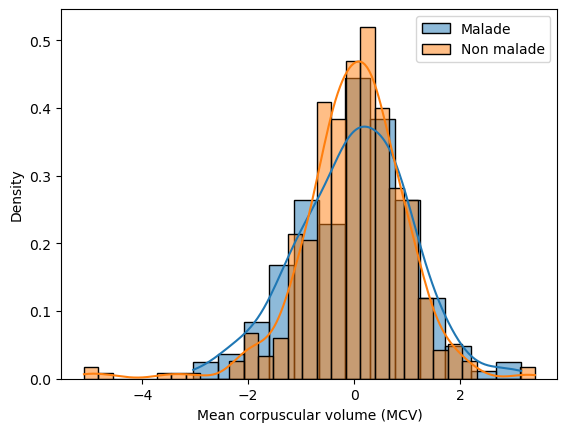

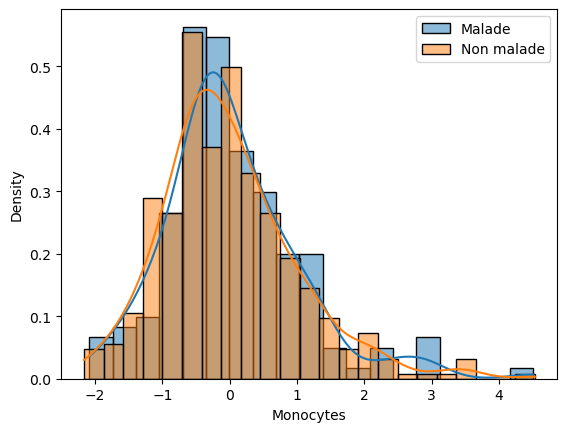

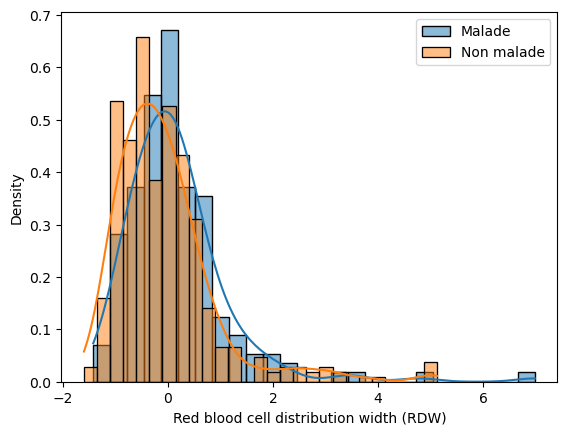

In [425]:
for col in blood_columns : 
    plt.figure()
    sns.histplot(malade_df[col], label='Malade', stat='density', kde=True  )
    sns.histplot(non_malade_df[col], label='Non malade', stat='density', kde=True  )
    plt.legend()
    plt.show()
    
#NB: quand on extrait un sous dataframme(et que l'extraction se base sur des lignes), 
#comme malade_df = df[df['est malade'] == True](qui signifie : extrais moi toutes les lignes du dataframe 'df' où la 
#colonne 'est malade' est égal à 'true' et affecte le à malade_df ), ce sous dataframe contient toutes les colone
# du dataframe initiale(df) et les lignes repondant à la condition

In [426]:
df

Patient age quantile SARS-Cov-2 exam result  \
0                       13               negative   
1                       17               negative   
2                        8               negative   
3                        5               negative   
4                       15               negative   
...                    ...                    ...   
5639                     3               positive   
5640                    17               negative   
5641                     4               negative   
5642                    10               negative   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903         0.578024   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
0             NaN                                               NaN   
1        0.318366                          

### Relation hospitalisation / est malade

In [430]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1 :
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins semi-intensifs'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [450]:
df['status'] = df.apply(hospitalisation, axis=1)
df.head()
# on crée dans le dataframe df une autre colonne 'status', qui va contenir le resultat de la fonction 'hospitalisation'
# appliquée sur le dataframe
#ici axis=1 dans apply() est utilisé car hospitalisation() doit analyser chaque ligne du DataFrame 
#(les valeurs des colonnes spécifiques pour chaque ligne) pour déterminer le type d'hospitalisation.








Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

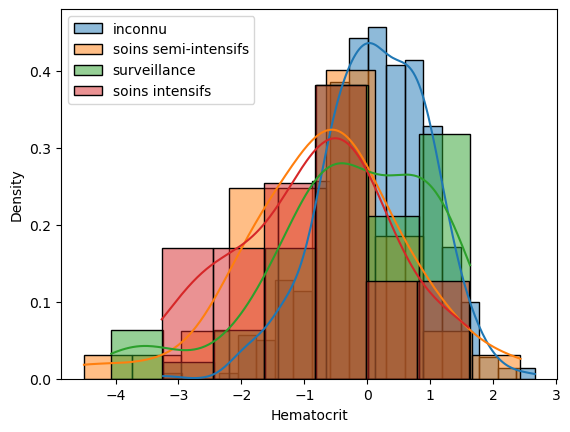

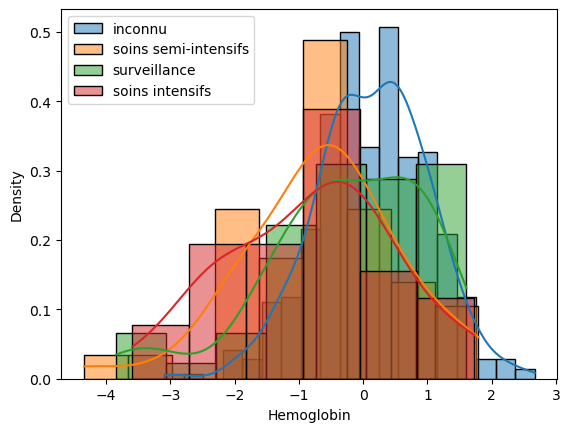

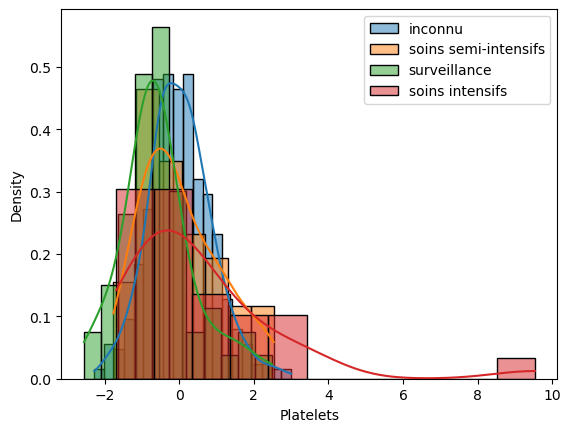

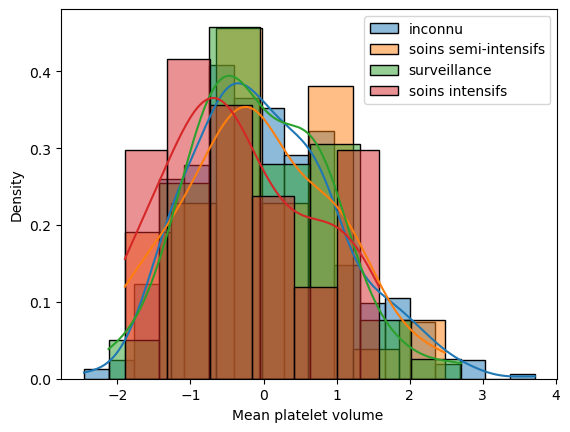

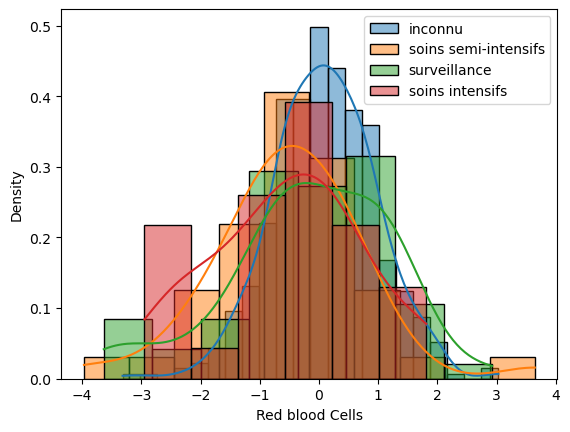

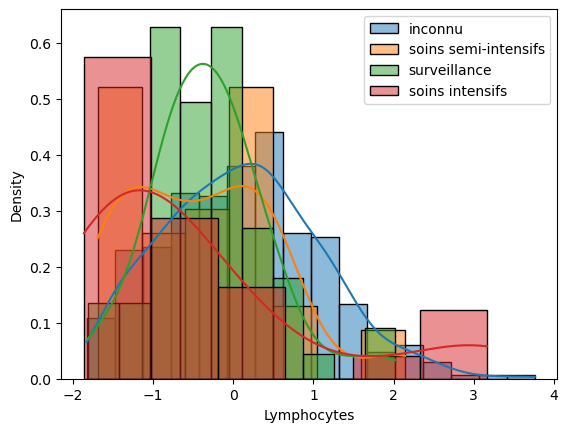

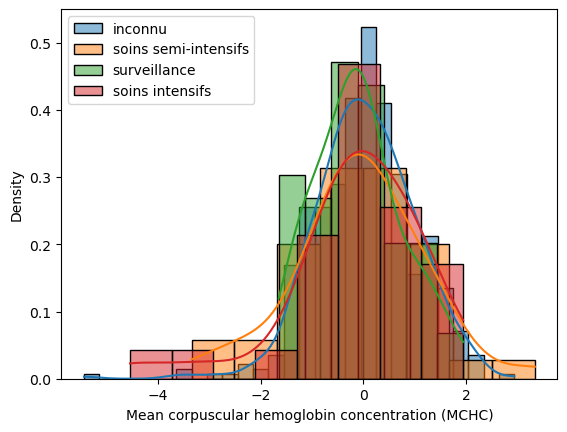

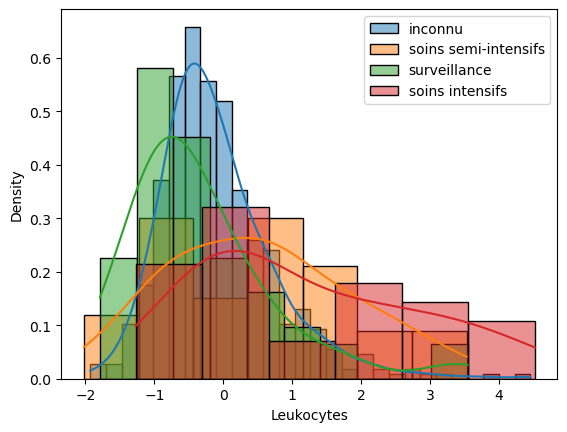

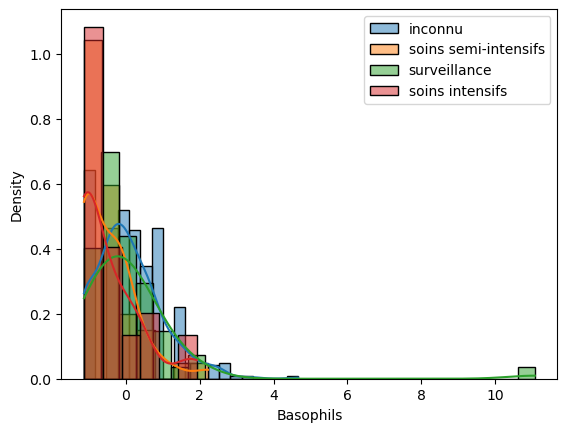

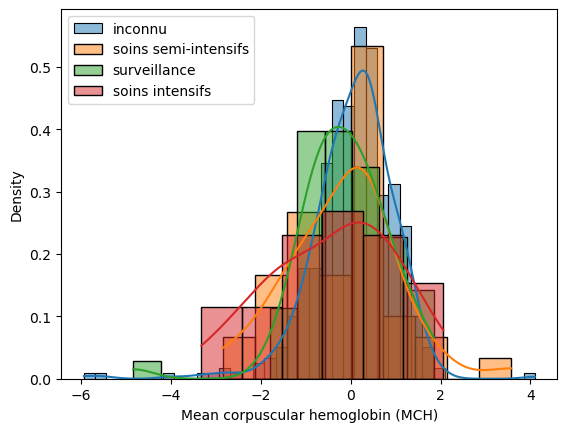

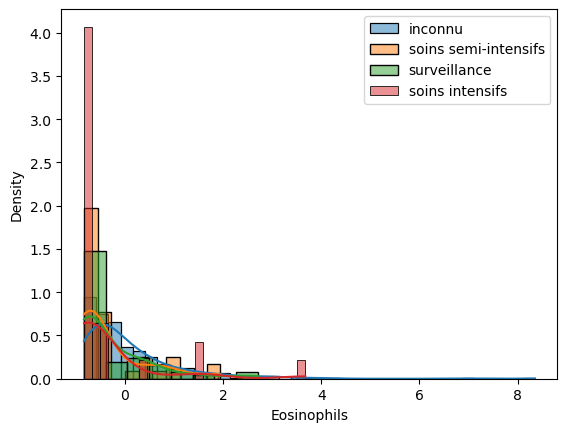

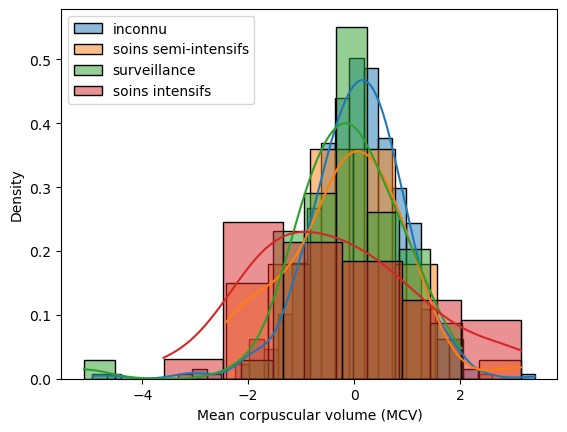

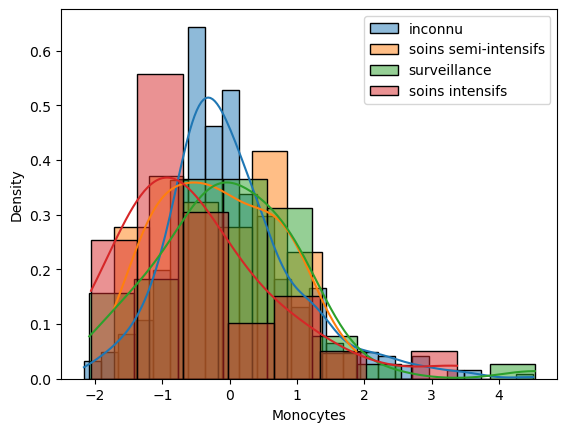

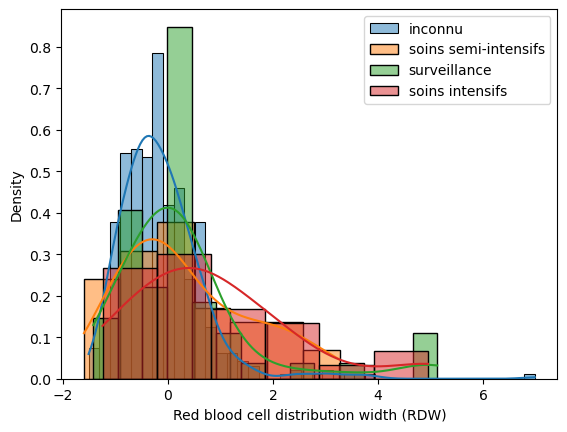

In [469]:
for col in blood_columns:
    plt.figure()
    for cat in df['status'].unique():
        sns.histplot(df[df['status'] == cat][col], label=cat, stat='density', kde=True)
        plt.legend()

#ici on affiche sur la meme figure pour chaque test sanguin(colonne dans blood_columns()) les differents status
# d'hospitalisation

In [452]:
df['status'].unique()

array(['inconnu', 'soins semi-intensifs', 'surveillance',
       'soins intensifs'], dtype=object)

### NaN Analyse

In [470]:
dfblood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [471]:
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

<Axes: >

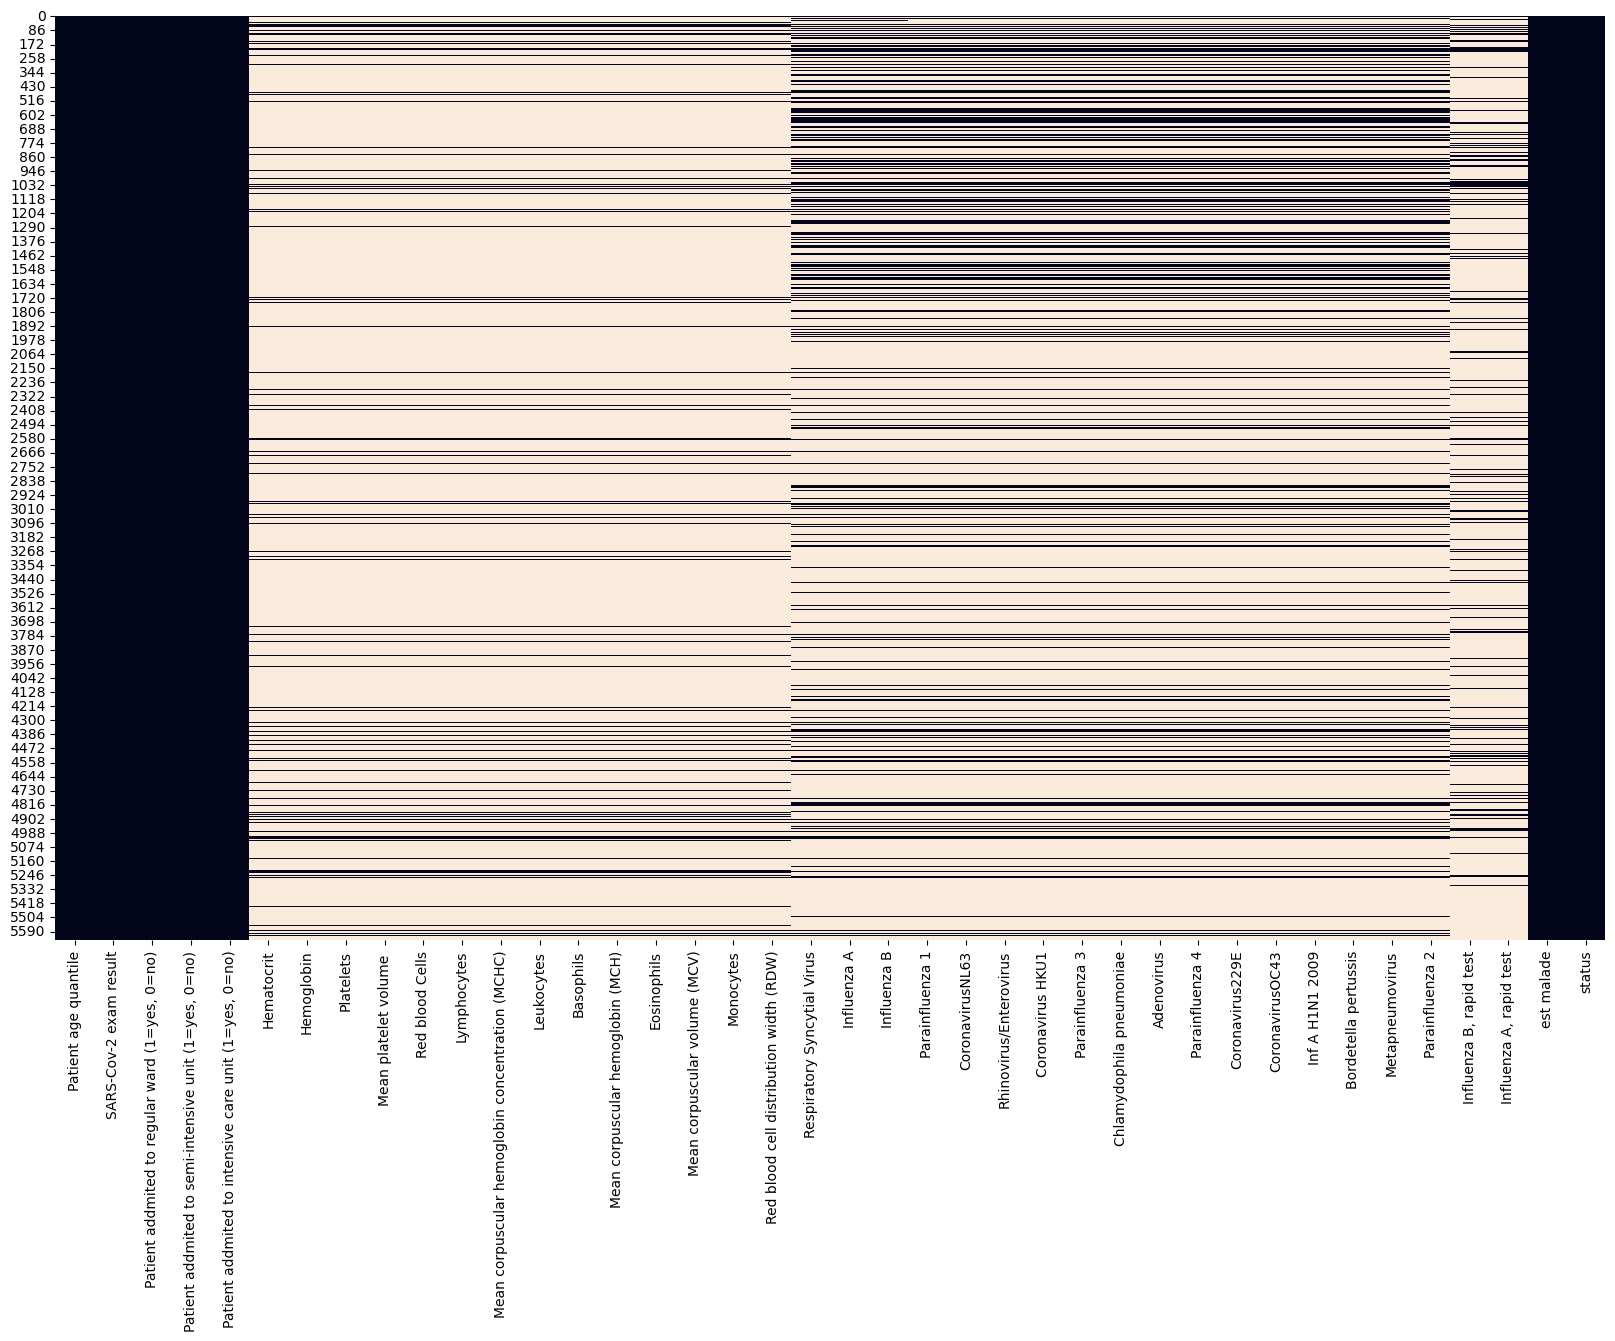

In [478]:
plt.figure(figsize=(20,12))
sns.heatmap(df.isna(), cbar=False)

In [486]:
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

In [489]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [506]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [509]:
df1 = df[viral_columns[:-2]].copy()
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

covid
negative    0.91716
positive    0.08284
Name: proportion, dtype: float64

In [510]:
df2 = df[blood_columns[:-2]].copy()
df2['covid'] = df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)


covid
negative    0.864775
positive    0.135225
Name: proportion, dtype: float64

**On constate que si l'on supprime toutes les ligne contenant une valeur manquante, on se retrouve au total avec 99 ligne de notre dataframe, c'est pourquoi au lieu de prendre tout le dataframe en compte, on ne prendra en compte que les les deux importante categories à savoir, blood_columns et viral_columns, comme ces colonnes sont les plus importantes pour la prise de decision et contiennent assez de données donc on ajoutes à ces sous dataframe la  colonne target('SARS-Cov-2 exam result') qui est aussi crucial pour la prise de decision. et ainsi on peut dropper les lignes contenant des valeurs NaN dans ces deux categories. On se retrouve donc avec 599 lignes au lieu de 99**

In [513]:
df2.dropna().head(8)


Hematocrit  Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
1     0.236515   -0.022340  -0.517413               0.010677         0.102004   
8    -1.571682   -0.774212   1.429667              -1.672222        -0.850035   
15   -0.747693   -0.586244  -0.429480              -0.213711        -1.361315   
18    0.991838    0.792188   0.072992              -0.550290         0.542763   
22    0.190738   -0.147652  -0.668155               1.020415        -0.127191   
28    1.014726    0.854844  -0.178244               0.796029         0.489872   
29    0.740064    0.854844   0.361914              -0.550290         0.436981   
30   -0.679027   -0.711556   0.952319              -0.886869        -0.321124   

    Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  \
1      0.318366                                         -0.950790   -0.094610   
8     -0.005738                                          3.331071    0.364550   
15    -1.114514                                          0.542882   -0.884923   
18     0.045436                                         -0.452899   -0.211488   
22     0.002791                                         -1.249524   -1.132592   
28    -0.730707                                         -0.353319   -0.075131   
29    -0.227493                                          0.642463    0.105751   
30    -0.875701                                         -0.253742   -0.286623   

    Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
1   -0.223767                          -0.292269     1.482158   
8   -0.223767                           0.178175     1.018625   
15   0.081693                           1.746323    -0.666950   
18  -0.834685                           0.334989    -0.709090   
22   0.387152                          -0.083183    -0.709090   
28   2.525365                           0.544077     0.217977   
29  -0.529226                           0.596348    -0.371974   
30  -0.223767                          -0.710443    -0.540532   

    Mean corpuscular volume (MCV)     covid  
1                        0.166192  negative  
8                       -1.336024  negative  
15                       1.668409  negative  
18                       0.606842  negative  
22                       0.566783  negative  
28                       0.767079  negative  
29                       0.386517  negative  
30                      -0.675050  negative

In [514]:
df1.dropna().head(8)


Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
1                 not_detected  not_detected  not_detected    not_detected   
4                 not_detected  not_detected  not_detected    not_detected   
8                 not_detected  not_detected  not_detected    not_detected   
9                 not_detected  not_detected  not_detected    not_detected   
13                not_detected  not_detected  not_detected    not_detected   
14                not_detected  not_detected  not_detected    not_detected   
15                not_detected  not_detected  not_detected    not_detected   
18                not_detected  not_detected  not_detected    not_detected   

   CoronavirusNL63 Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
1     not_detected               detected     not_detected    not_detected   
4     not_detected               detected     not_detected    not_detected   
8     not_detected           not_detected     not_detected    not_detected   
9     not_detected           not_detected     not_detected    not_detected   
13    not_detected           not_detected     not_detected    not_detected   
14    not_detected           not_detected     not_detected    not_detected   
15    not_detected           not_detected     not_detected    not_detected   
18    not_detected               detected     not_detected    not_detected   

   Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
1              not_detected  not_detected    not_detected    not_detected   
4              not_detected  not_detected    not_detected    not_detected   
8              not_detected  not_detected    not_detected    not_detected   
9              not_detected  not_detected    not_detected    not_detected   
13             not_detected  not_detected    not_detected    not_detected   
14             not_detected  not_detected    not_detected    not_detected   
15             not_detected  not_detected    not_detected    not_detected   
18             not_detected  not_detected    not_detected    not_detected   

   CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
1     not_detected    not_detected         not_detected    not_detected   
4     not_detected    not_detected         not_detected    not_detected   
8     not_detected    not_detected         not_detected    not_detected   
9     not_detected    not_detected         not_detected    not_detected   
13    not_detected    not_detected         not_detected    not_detected   
14    not_detected    not_detected         not_detected    not_detected   
15    not_detected        detected         not_detected    not_detected   
18    not_detected    not_detected         not_detected    not_detected   

   Parainfluenza 2     covid  
1     not_detected  negative  
4     not_detected  negative  
8     not_detected  negative  
9     not_detected  negative  
13    not_detected  negative  
14    not_detected  negative  
15    not_detected  negative  
18    not_detected  negative

## 2.2. Hypotheses nulle(H0)

### T-Test
Le test t de Student (ou t-test) est un test statistique permettant de vérifier si la différence entre les moyennes de deux groupes est statistiquement significative. La fonction ttest_ind de scipy.stats réalise un test t pour deux échantillons indépendants, afin de comparer les moyennes de deux groupes indépendants et voir si elles diffèrent de manière significative.

- from scipy.stats import ttest_ind
- t_stat, p_val = ttest_ind(groupe1, groupe2)

Dans les résultats, la valeur p_val indique si la différence entre les moyennes est significative. Si p_val est inférieur à un seuil donné (souvent 0.05), on considère que le résultat est significatif, et on peut rejeter l'hypothèse nulle selon laquelle les deux groupes ont la même moyenne.

NB: **Pour le test t de Student avec deux échantillons indépendants (ttest_ind), les deux groupes n'ont pas besoin d'être parfaitement équilibrés (c’est-à-dire avoir exactement le même nombre d'éléments). Cependant, un écart de taille important entre les deux groupes peut affecter la précision du test et réduire sa puissance statistique.**

C'est pourquoi ci-dessous on essaye de sampler le negative_df pour avoir le meme nombre de ligne que positive_df


In [515]:
from scipy.stats import ttest_ind

In [516]:
positive_df.shape

(558, 38)

In [517]:
negative_df.shape

(5086, 38)

In [522]:
balanced_ned = negative_df.sample(positive_df.shape[0])
#permet d'extraire au hazard 558 lignes dans le negative_df


In [523]:
def t_test(col):
    alpha = 0.02 #le seuil
    stat, p = ttest_ind(balanced_ned[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else:
        return 0

In [525]:
for col in blood_columns:
    print(f'{col :-<50}{t_test(col)}')

Hematocrit----------------------------------------H0 Rejetée
Hemoglobin----------------------------------------H0 Rejetée
Platelets-----------------------------------------H0 Rejetée
Mean platelet volume -----------------------------0
Red blood Cells-----------------------------------0
Lymphocytes---------------------------------------0
Mean corpuscular hemoglobin concentration (MCHC)--0
Leukocytes----------------------------------------H0 Rejetée
Basophils-----------------------------------------0
Mean corpuscular hemoglobin (MCH)-----------------0
Eosinophils---------------------------------------H0 Rejetée
Mean corpuscular volume (MCV)---------------------0
Monocytes-----------------------------------------H0 Rejetée
Red blood cell distribution width (RDW)-----------0
